In [1]:
# @ts-nocheck
# cspell:disable
# ruff: noqa

# **Library Imports & Initial Setup**
#### Importing Liberaries

In [ ]:
# Standard libraries
import os
import math
import warnings

# Data manipulation libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.mstats import winsorize

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from matplotlib.gridspec import GridSpec
import seaborn as sns
from IPython.display import display
from tabulate import tabulate

# Machine learning: preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold

# Machine learning: metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, precision_recall_curve, auc
)

# Machine learning: models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Imbalanced learning
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

# Custom modules
import import_ipynb
from Setup import ( # type: ignore
    Load_Dataset, visualization, df_info, df_unique_counts, display_metrics,
    df_feature_importances, print_list, generate_subplots, gen_dist_plot_grp,
    plot_roc_curves, plot_pr_curves, plot_metrics_comparison, plot_confusion_matrices
)


warnings.filterwarnings('ignore')

In [3]:
# I have defined all general styles of plots in a separate function, in a separate file (to keep code less repetitive and clean)
visualization(fig_size=(10, 6))

pd.set_option('display.max_colwidth', None)


<Figure size 1200x720 with 0 Axes>

_____________________

# **Phase 1 -** Data Understanding (Exploratory Data Analysis - EDA)
#### Objective: Understand the dataset, distributions, and feature relationships.

## **Data Inspection & Summary Statistics**

In [4]:
df = Load_Dataset('Datasets\Stroke_Dataset.parquet')

Dataset loaded successfully with 5110 rows and 12 columns
DataFrame Shape:  (5110, 12)


In [5]:
df.head(5)

Patient_ID  Gender  Age Hypertension Heart_Disease Ever_Married  \
0        9046    Male   67           No           Yes          Yes   
1       51676  Female   61           No            No          Yes   
2       31112    Male   80           No           Yes          Yes   
3       60182  Female   49           No            No          Yes   
4        1665  Female   79          Yes            No          Yes   

       Work_Type Residence_Type  Avg_Glucose_Level   BMI   Smoking_Status  \
0        Private          Urban             228.69  36.6  Formerly Smoked   
1  Self-employed          Rural             202.21   NaN     Never Smoked   
2        Private          Rural             105.92  32.5     Never Smoked   
3        Private          Urban             171.23  34.4           Smokes   
4  Self-employed          Rural             174.12  24.0     Never Smoked   

  Stroke  
0    Yes  
1    Yes  
2    Yes  
3    Yes  
4    Yes

In [6]:
df.tail(5)

Patient_ID  Gender  Age Hypertension Heart_Disease Ever_Married  \
5105       18234  Female   80          Yes            No          Yes   
5106       44873  Female   81           No            No          Yes   
5107       19723  Female   35           No            No          Yes   
5108       37544    Male   51           No            No          Yes   
5109       44679  Female   44           No            No          Yes   

          Work_Type Residence_Type  Avg_Glucose_Level   BMI   Smoking_Status  \
5105        Private          Urban              83.75   NaN     Never Smoked   
5106  Self-employed          Urban             125.20  40.0     Never Smoked   
5107  Self-employed          Rural              82.99  30.6     Never Smoked   
5108        Private          Rural             166.29  25.6  Formerly Smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

     Stroke  
5105     No  
5106     No  
5107     No  
5108     No  
5109     No

In [7]:
# Get categorical and numerical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()   # List containing columns of 'Object' datatype
numerical_features = df.select_dtypes(include=['int64', 'float']).columns.tolist()      # Same as above, but for "Int64" datatype

print("Columns with Numerical Data:")
print_list(numerical_features)

print("\nColumns with Categorical Data:")
print_list(categorical_features)

Columns with Numerical Data:



Columns with Categorical Data:


In [8]:
# Same as 'df.nunique()'
df_unique_counts(df)

In [9]:
# Shows information of dataset ' df.info() '
df_info(df)

In [10]:
# This will show all unique datatypes in dataset
print(df.dtypes.value_counts())

object     8
int64      2
float64    2
Name: count, dtype: int64


In [11]:
print("Dataset's Basic Statices")

df.describe().T

Dataset's Basic Statices


count          mean           std    min        25%  \
Patient_ID         5110.0  36517.829354  21161.721625  67.00  17741.250   
Age                5110.0     43.215264     22.633866   0.00     25.000   
Avg_Glucose_Level  5110.0    106.147677     45.283560  55.12     77.245   
BMI                4909.0     28.893237      7.854067  10.30     23.500   

                         50%       75%       max  
Patient_ID         36932.000  54682.00  72940.00  
Age                   45.000     61.00     82.00  
Avg_Glucose_Level     91.885    114.09    271.74  
BMI                   28.100     33.10     97.60

## **Data Visualization & Relationships**

#### **Distribution Analysis:** Now, Lets take a look at how data is distributed in our Dataset

- **Categorical Features**
  - Bar plots for features with more categories
  - Pie plots for features with fewer categories

In [ ]:
# generate_subplots & gen_dist_plot_grp are defined in Setup File!

<Figure size 1800x1800 with 0 Axes>

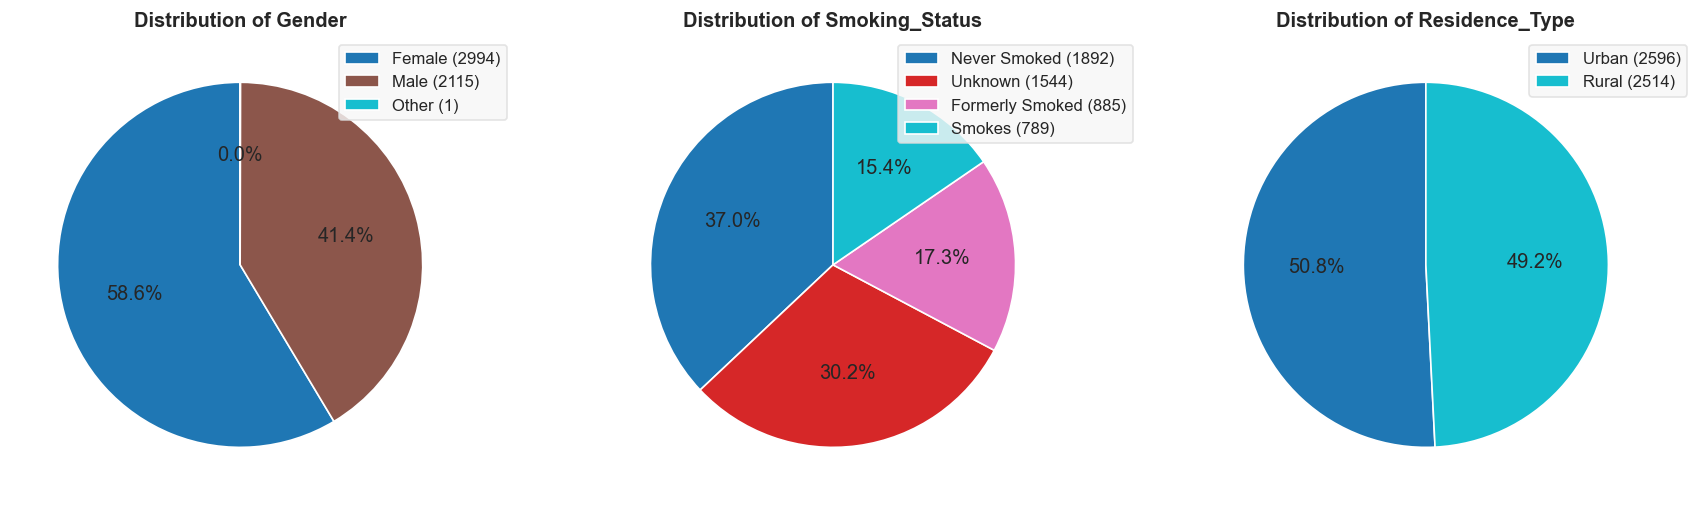

In [12]:
generate_subplots('pie', df, ['Gender', 'Smoking_Status', 'Residence_Type'], 3, fig_size=(15, 15))

<Figure size 2400x1800 with 0 Axes>

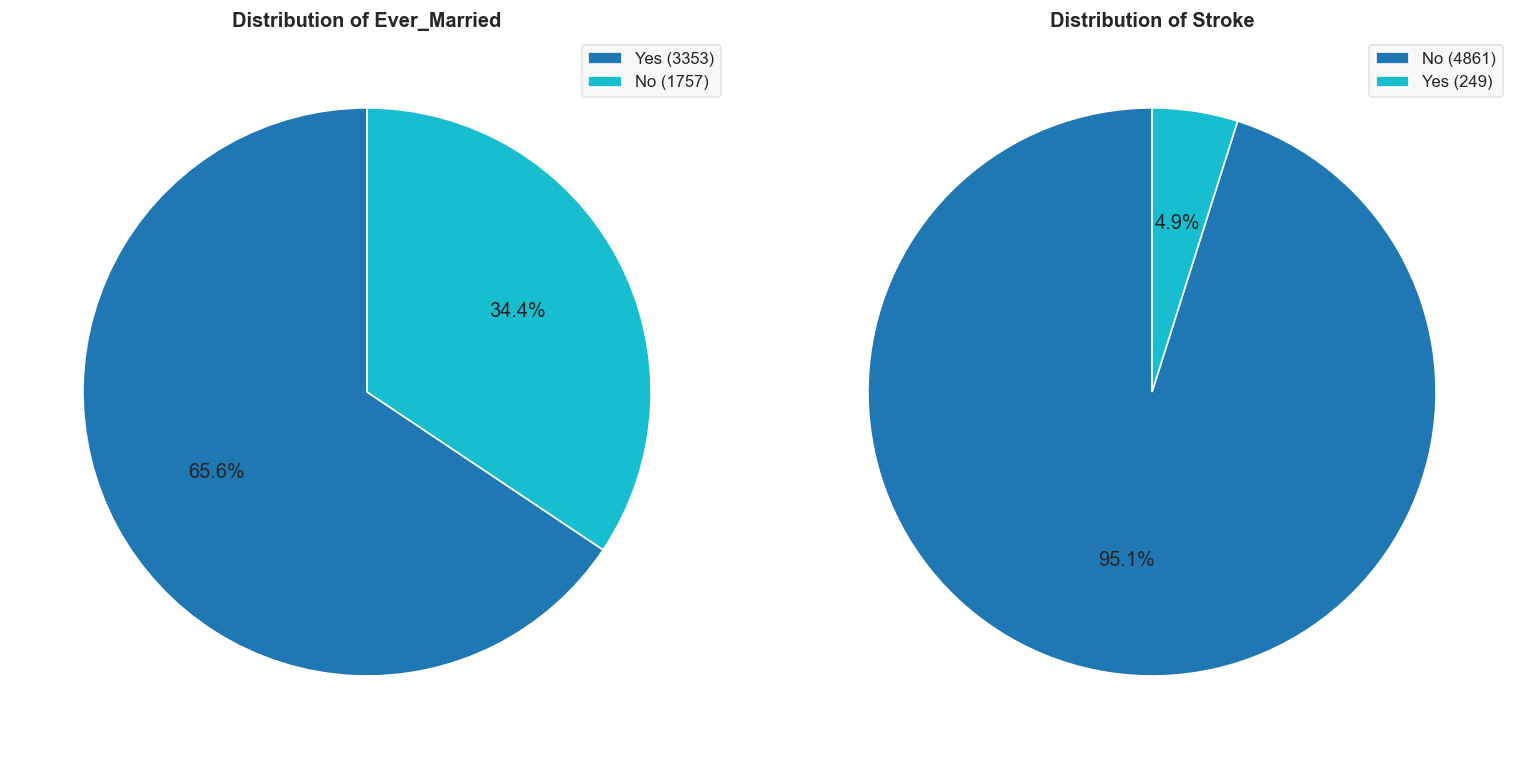

In [13]:
generate_subplots('pie', df, ['Ever_Married', 'Stroke'], 3, fig_size=(20, 15))

<Figure size 1800x600 with 0 Axes>

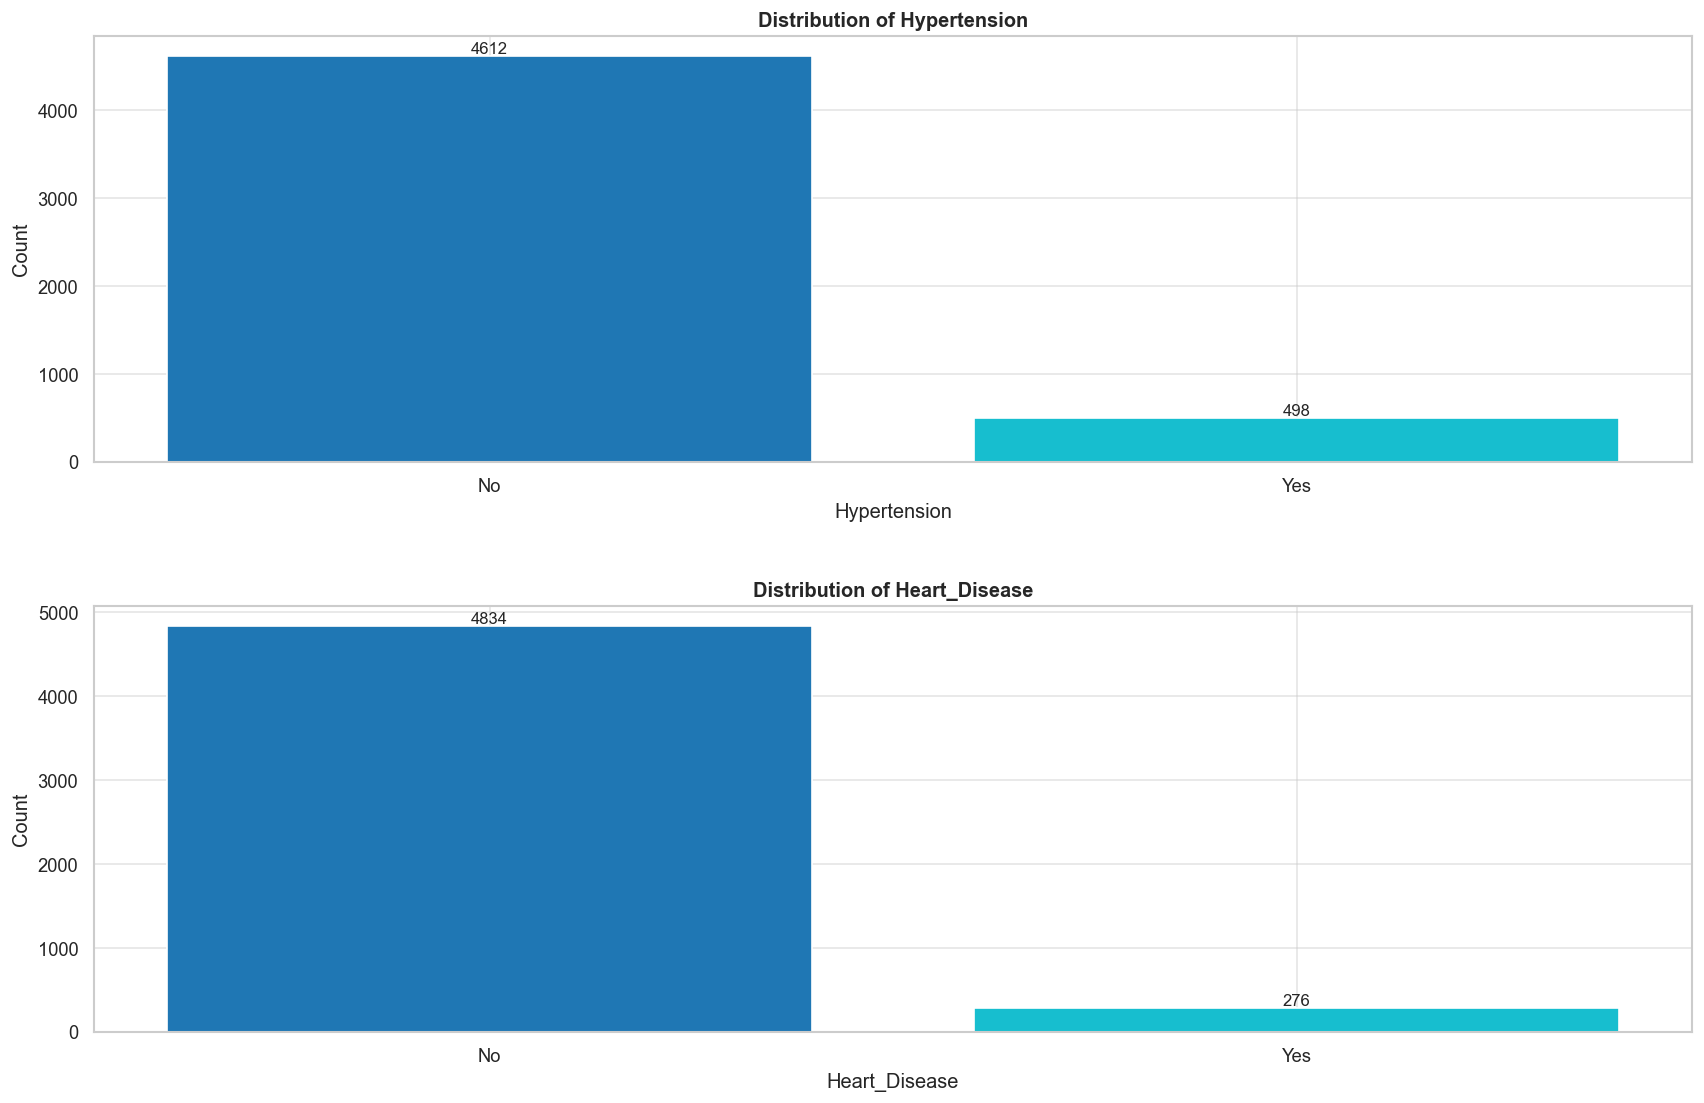

In [14]:
generate_subplots('bar', df, ['Hypertension', 'Heart_Disease'], 1, fig_size=(15, 5))

<Figure size 3000x960 with 0 Axes>

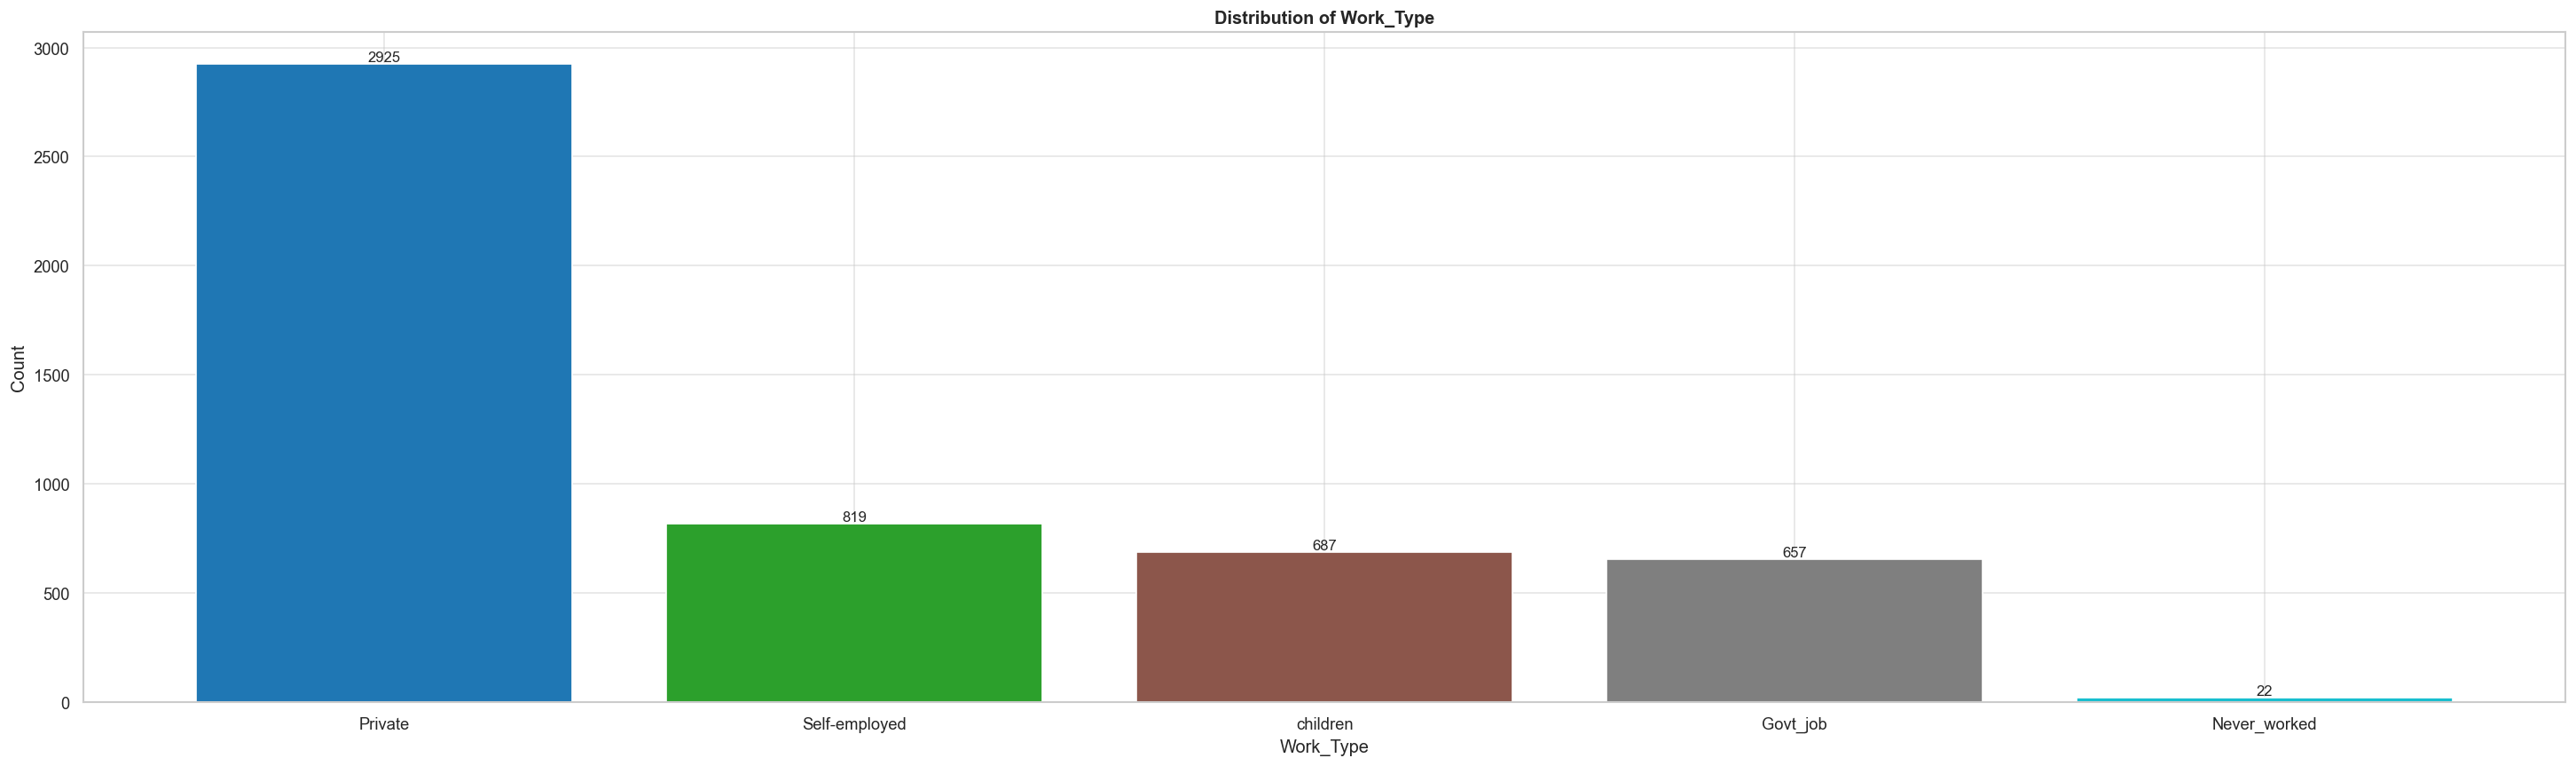

In [15]:
generate_subplots('bar', df, ['Work_Type'], 1, fig_size=(25, 8))

In [ ]:
# Run this block, if you want to see all the distributions

# Don't get confused, I've just used loop directly in argument to get all features (& condition to exclude a few)
generate_subplots('pie', df, [f for f in categorical_features if f not in ['Work_Type', 'Smoking_Status']], 3, fig_size=(15, 5))

- **Numerical Features**
  - Histograms
  - Box Plots & Violin Plots
  - Density Plots (KDE)

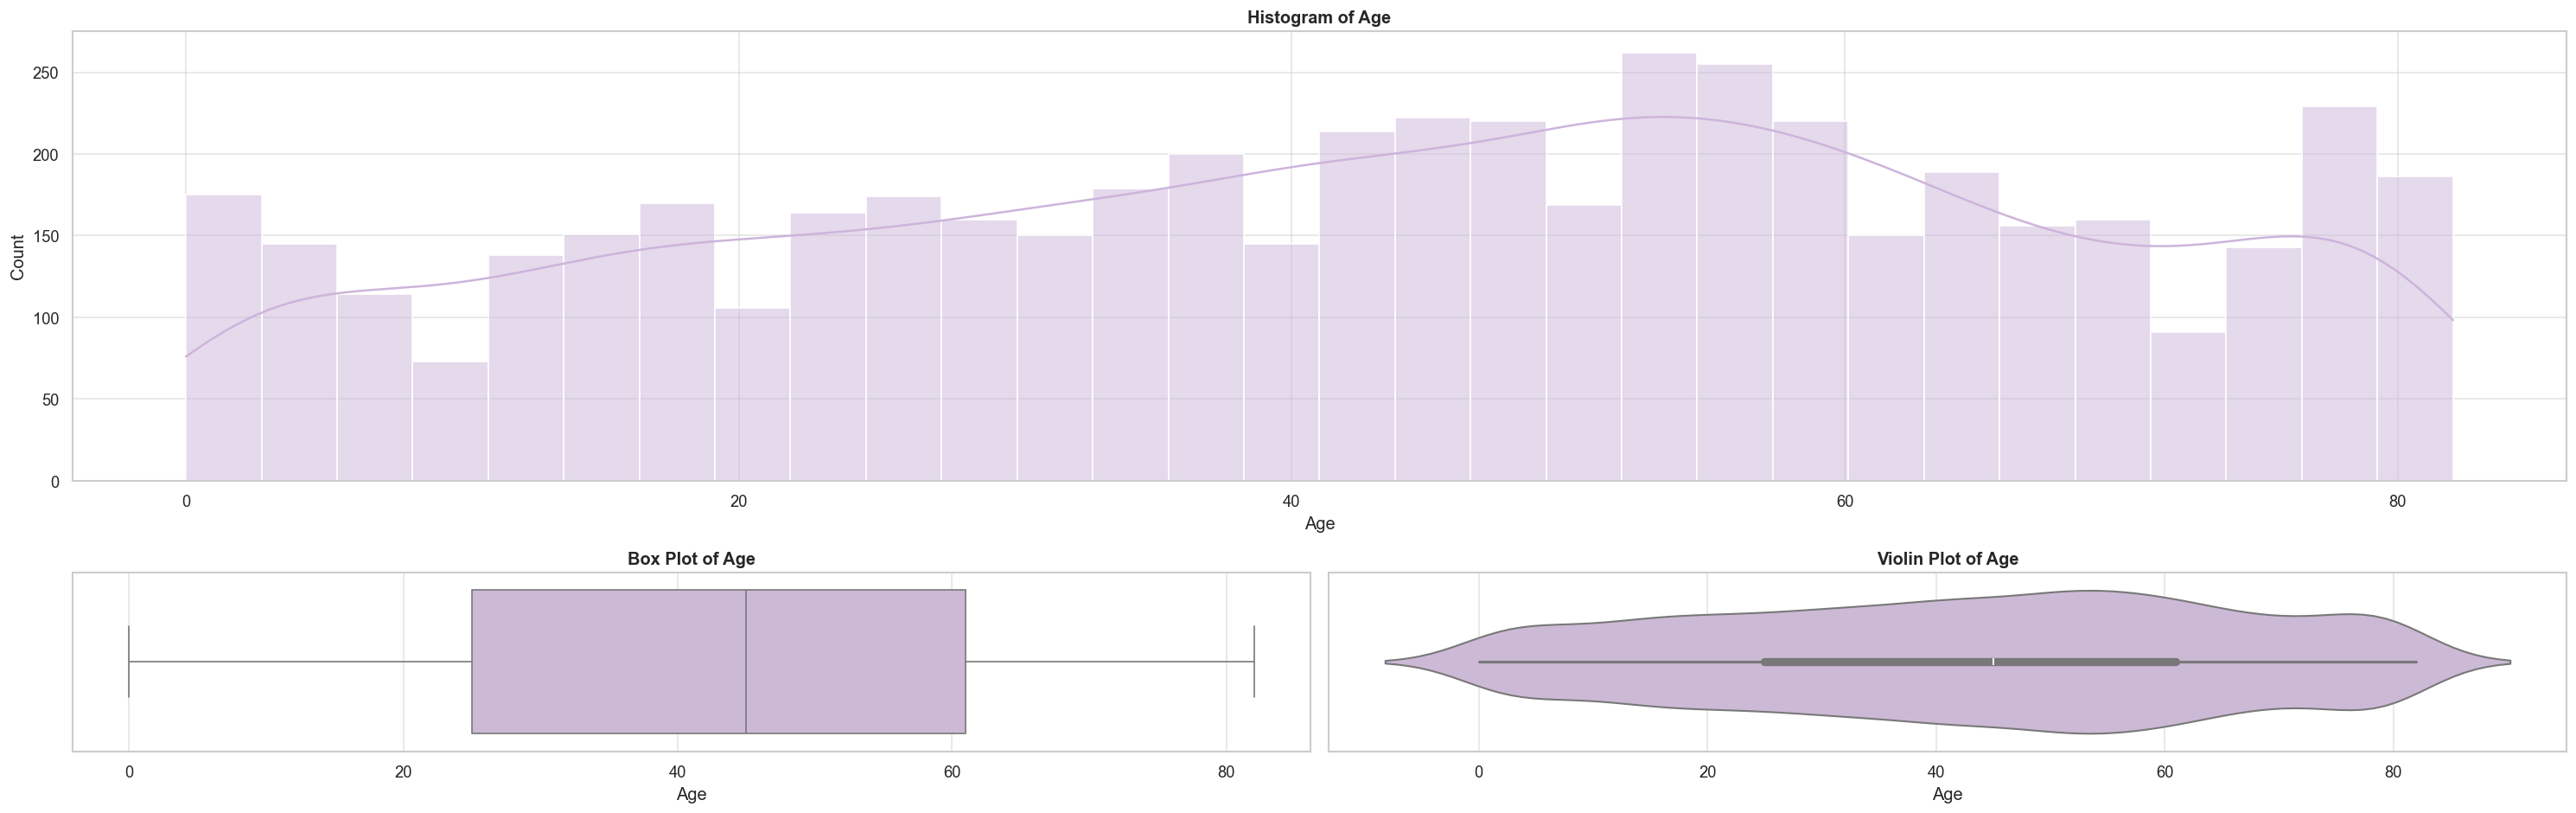

In [16]:
gen_dist_plot_grp(df, 'Age', 30, kde=True)

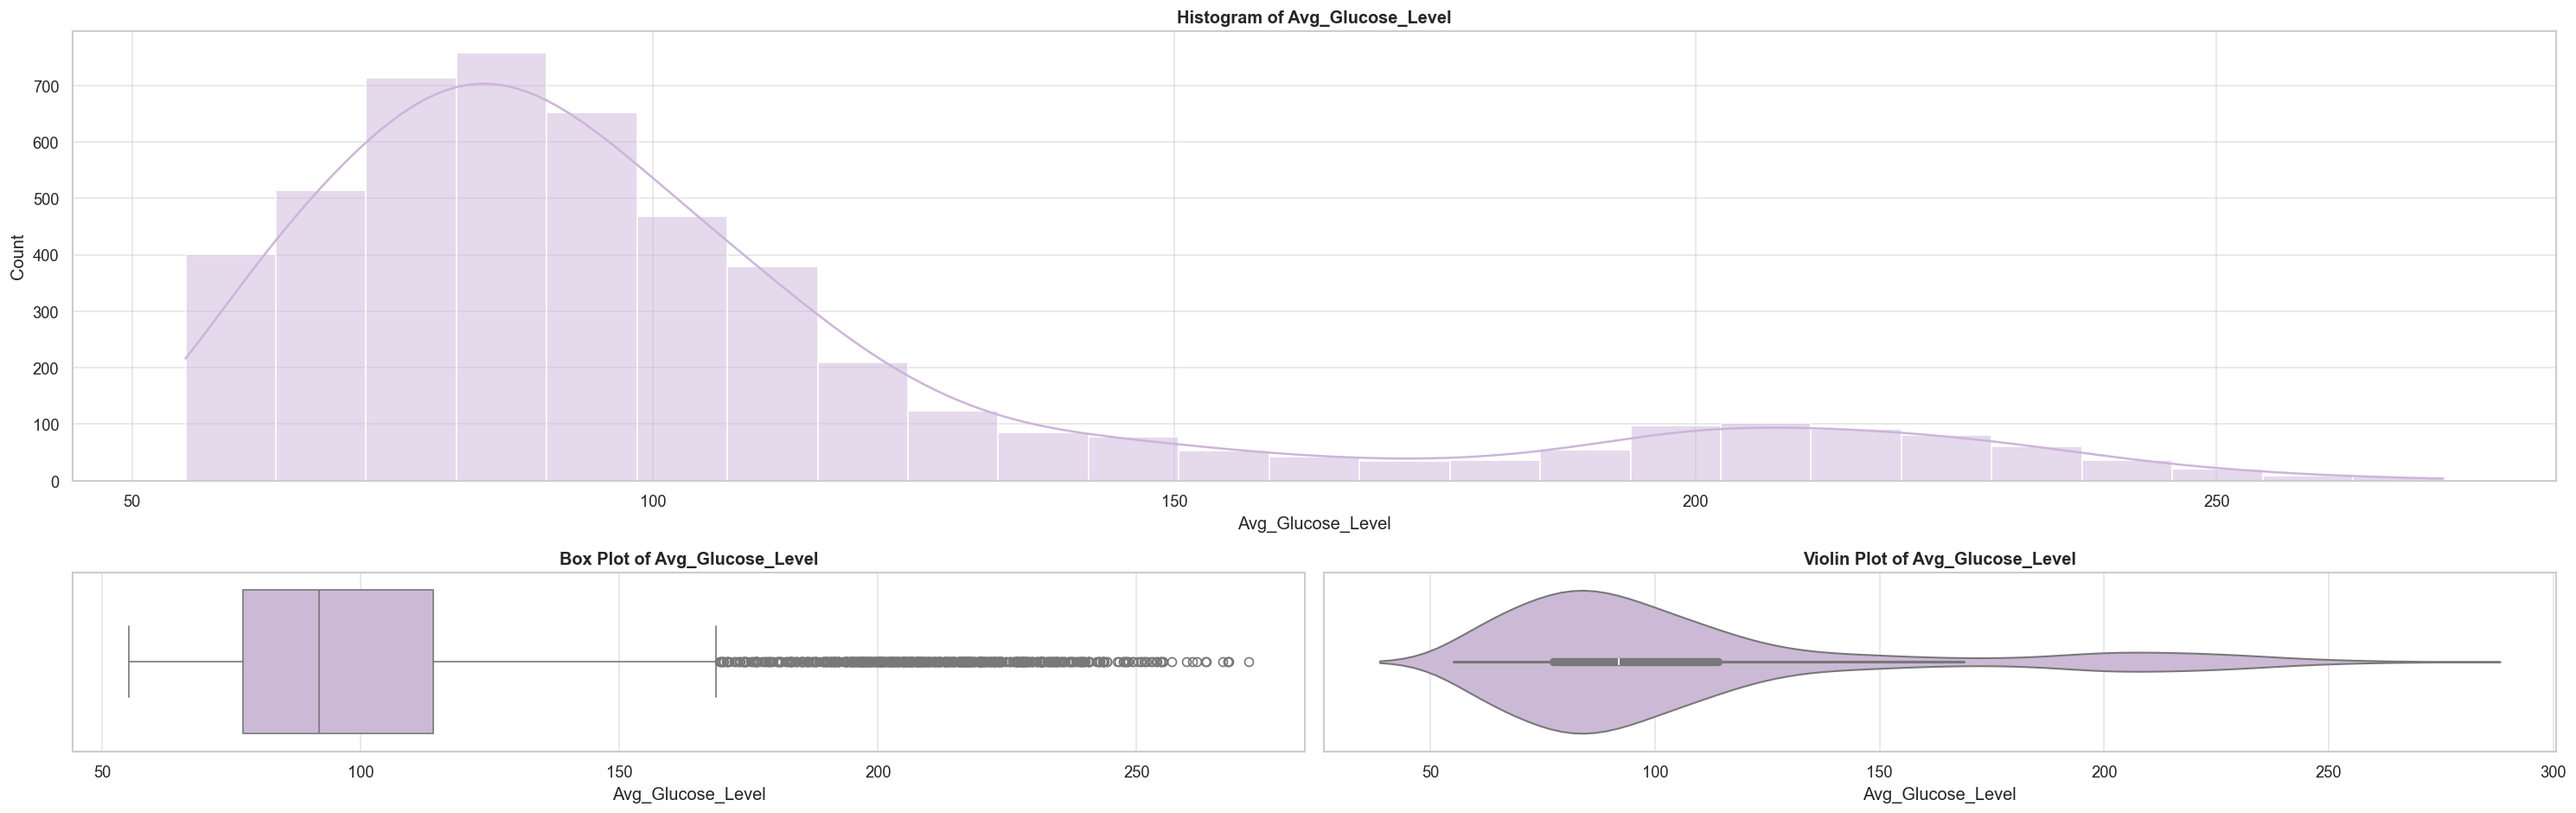

In [17]:
gen_dist_plot_grp(df, 'Avg_Glucose_Level', 25, kde=True)

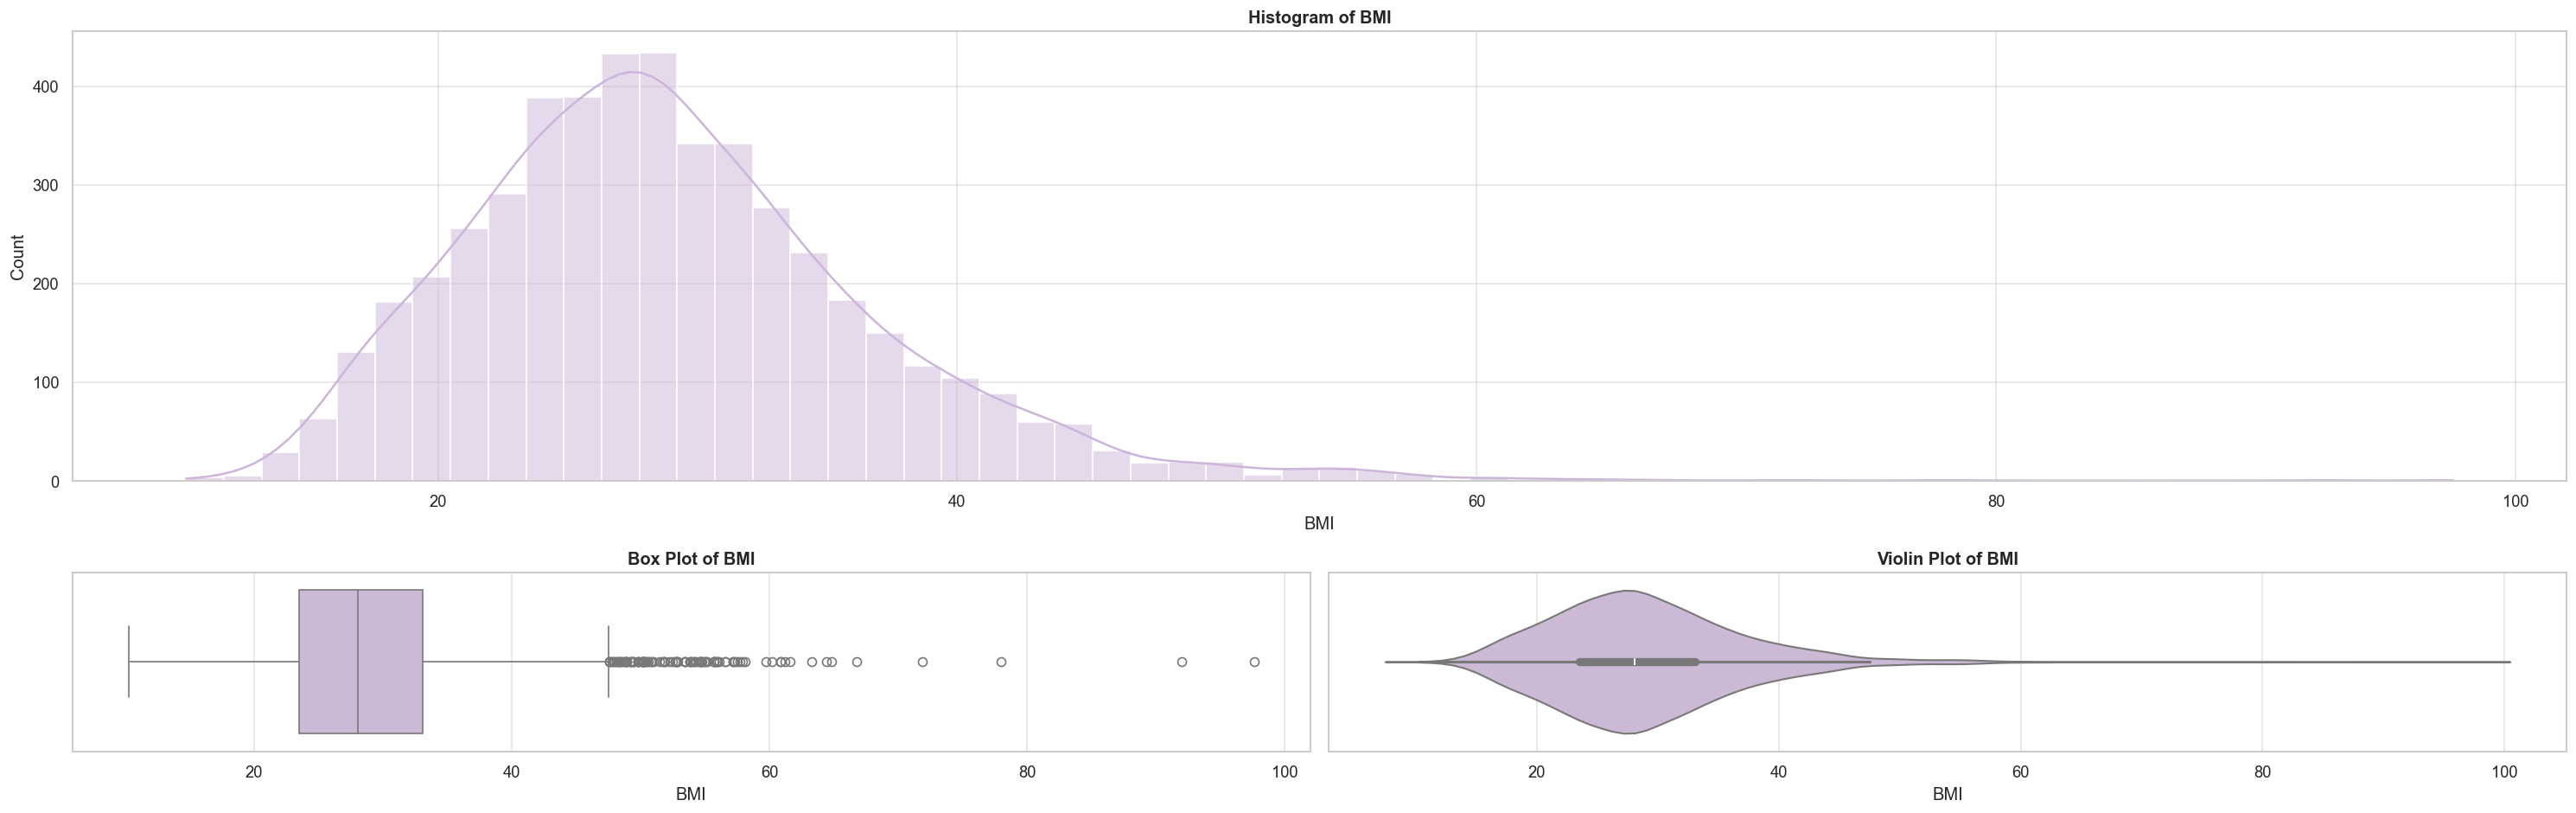

In [18]:
gen_dist_plot_grp(df, 'BMI', 60, kde=True)

#### **Feature Relationships:** Moving on, Lets take a look at Relationships between our features.

- **Relationship Analysis:**
    - Scatter Plots to identify correlations, patterns, outliers, and clusters

In [19]:
def generate_scatterplot(Dataframe, X, Y, Hue, Palette={"Yes": "blue", "No": "red"}):
    
    sns.scatterplot(
        data=Dataframe, 
        x=X, 
        y=Y,
        hue=Hue,
        palette=Palette,
        alpha=0.6
    )
    plt.title(f"{X} vs. {Y} (Colored by {Hue})", fontsize=14)
    plt.xlabel(f"{X}", fontsize=12)
    plt.ylabel(f"{Y}", fontsize=12)
    plt.legend(title=f"{Hue}")
    plt.tight_layout()
    plt.show()

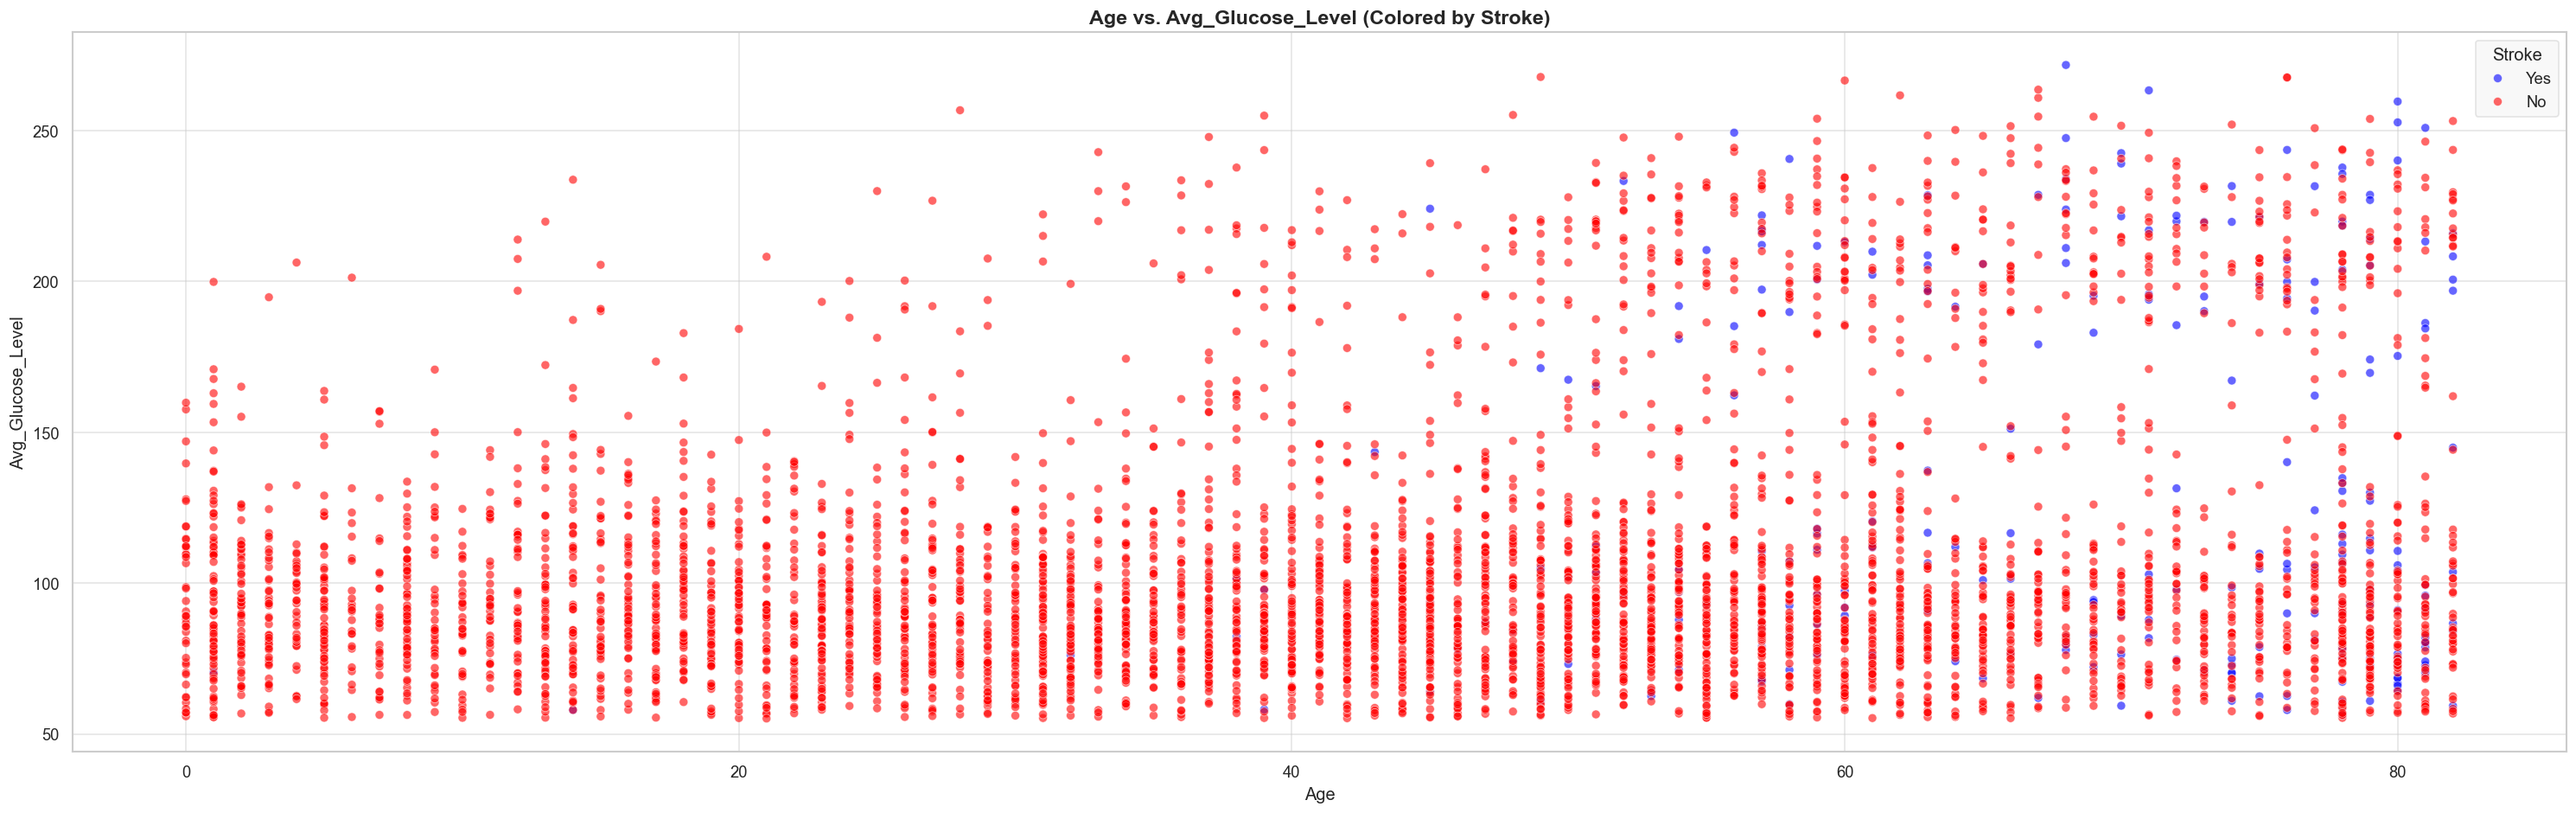

In [20]:
# Age vs. Avg_Glucose_Level (colored by Stroke)

generate_scatterplot(df, 'Age', 'Avg_Glucose_Level', 'Stroke')

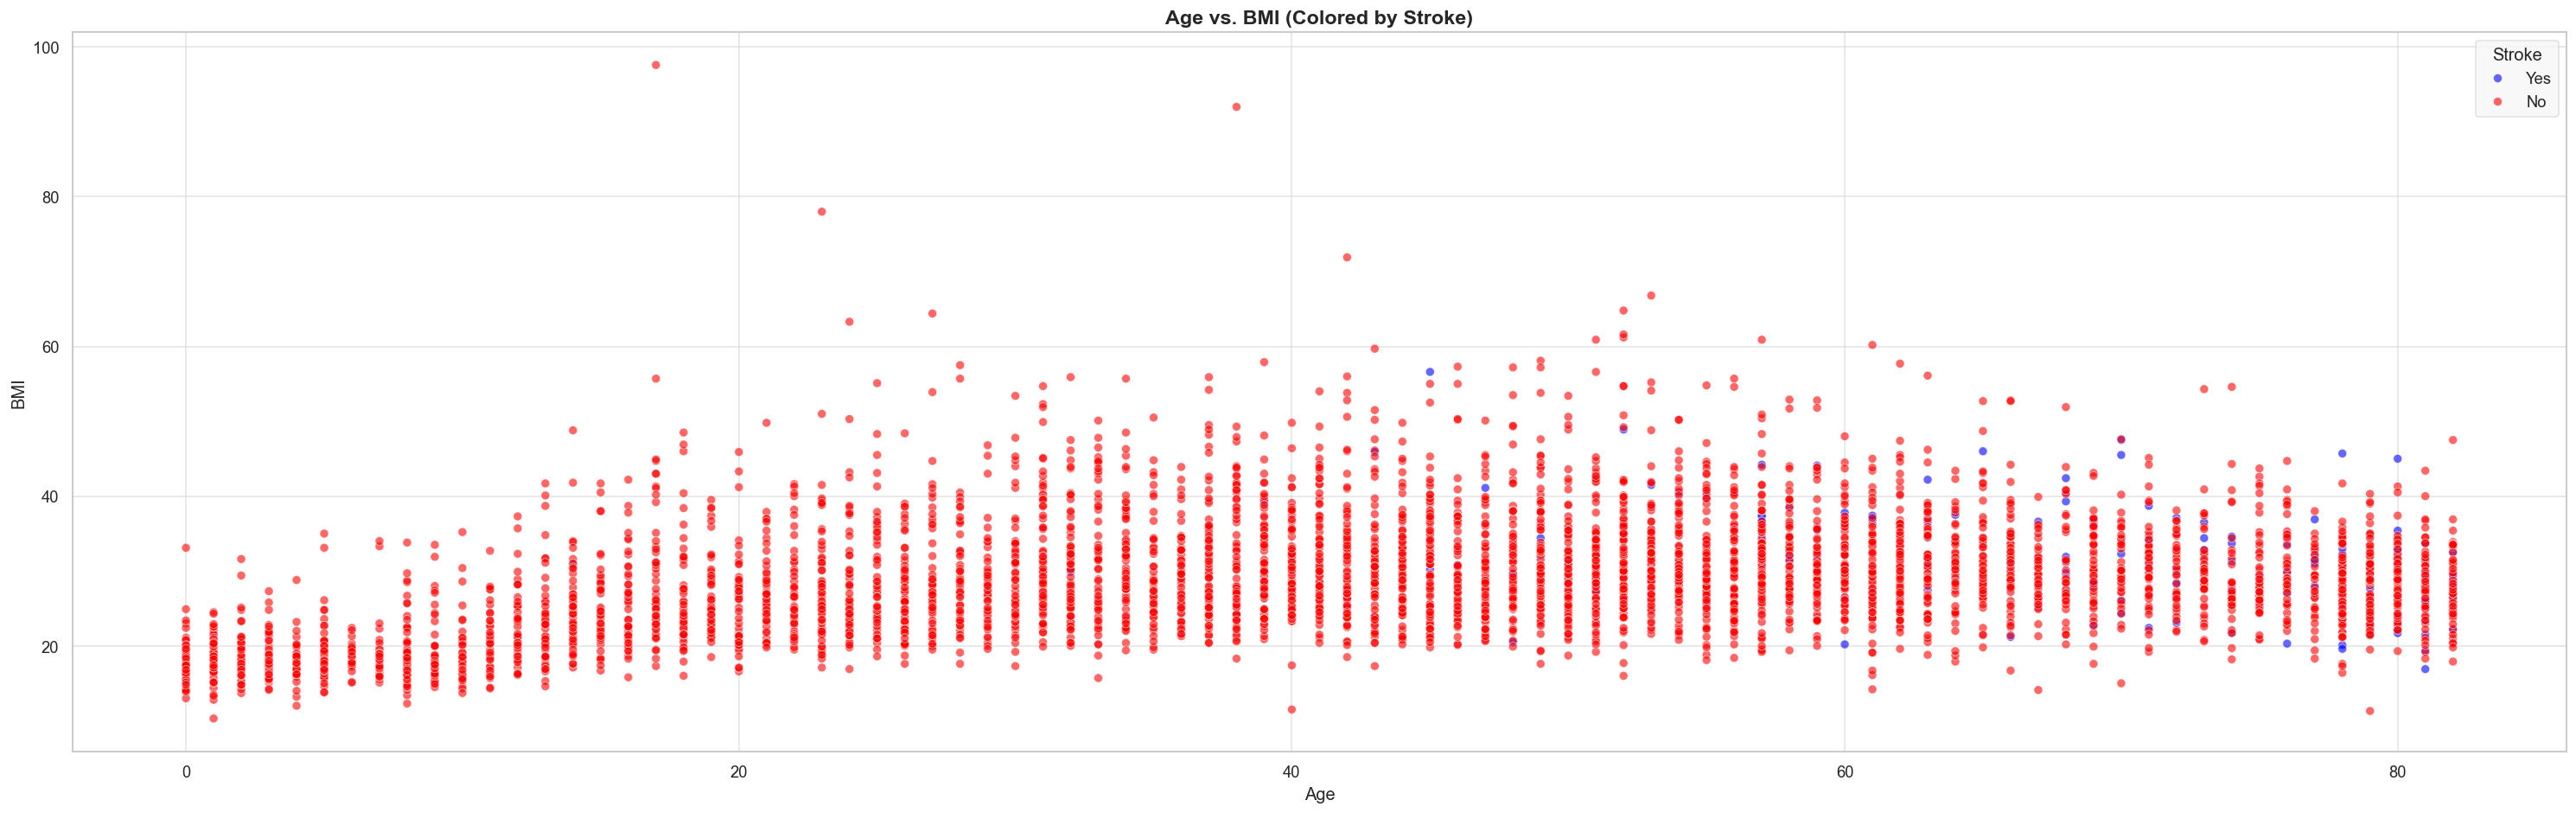

In [21]:
# Age vs. BMI (colored by Stroke)

generate_scatterplot(df, 'Age', 'BMI', 'Stroke')

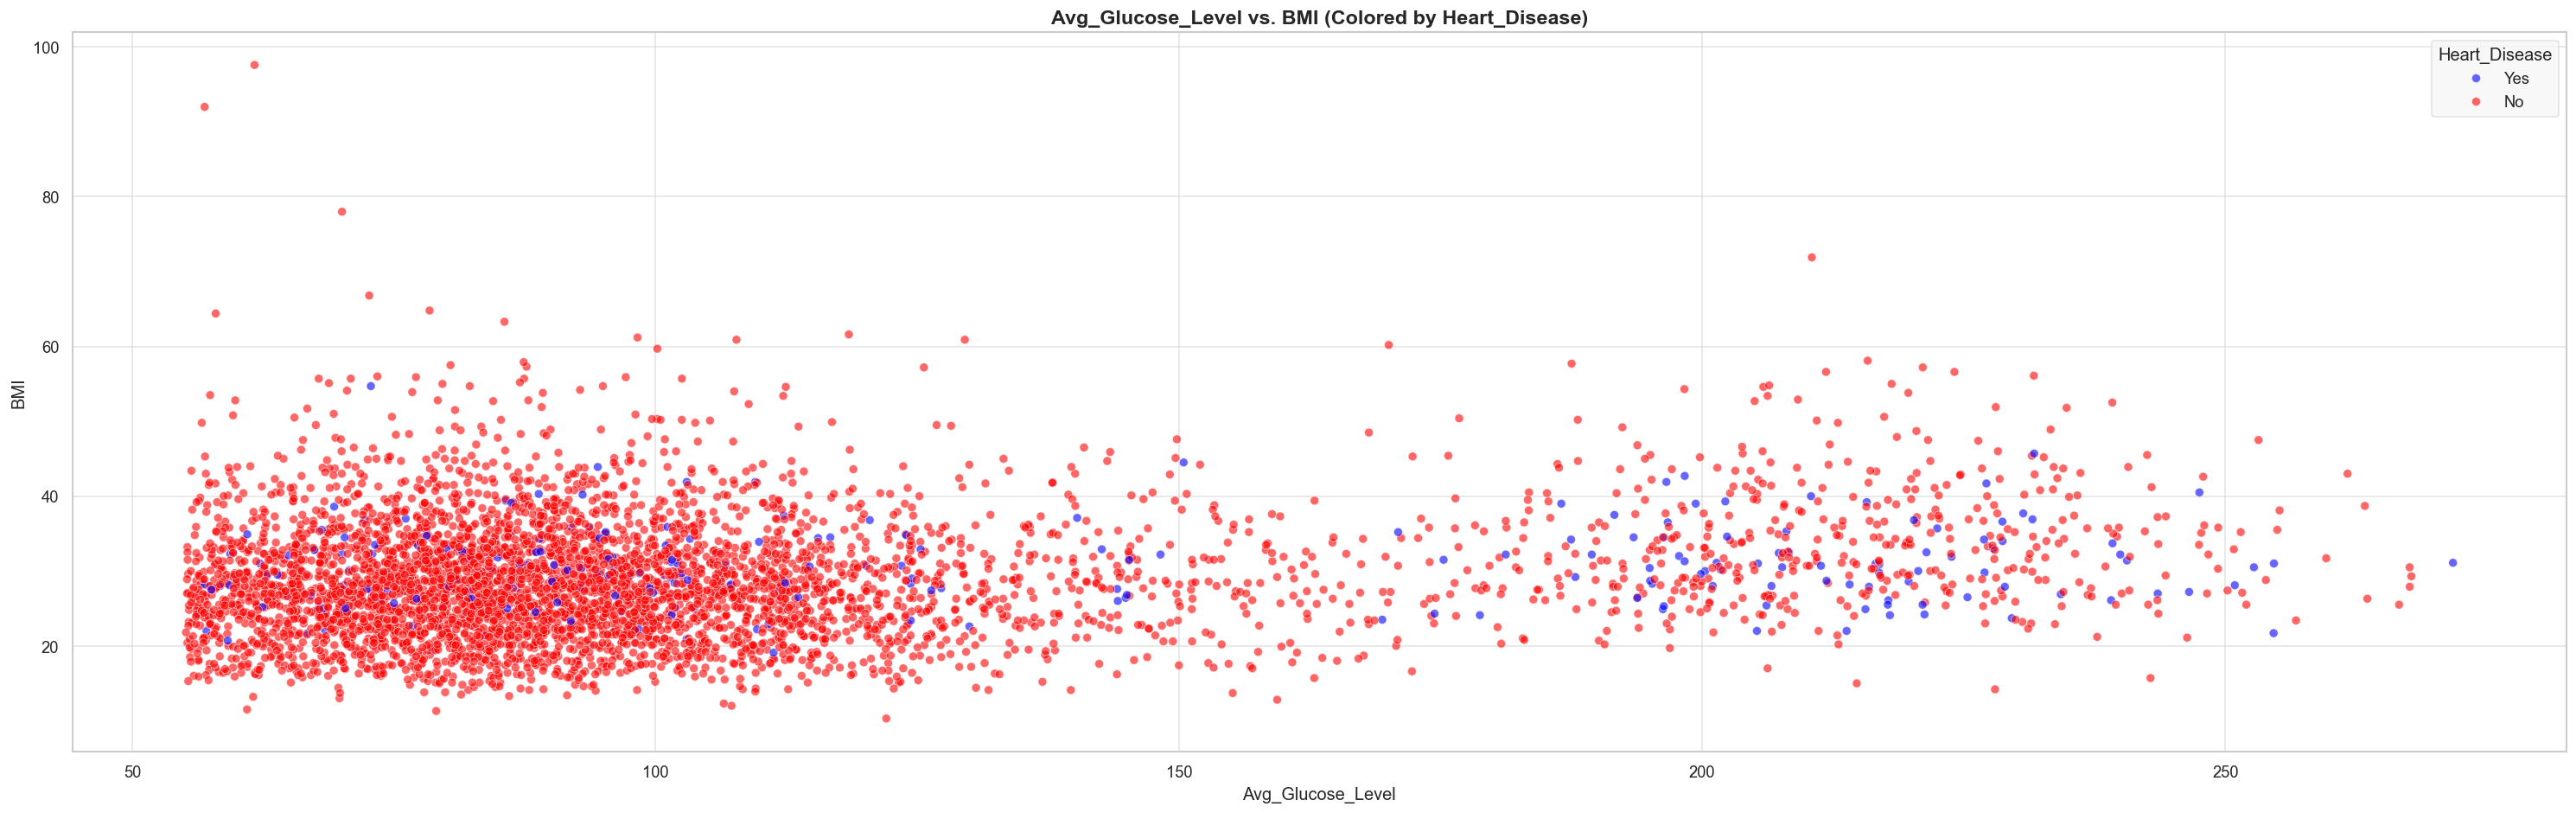

In [22]:
# Avg. Glucose vs. BMI (colored by Heart Disease)

generate_scatterplot(df,'Avg_Glucose_Level', 'BMI', 'Heart_Disease')

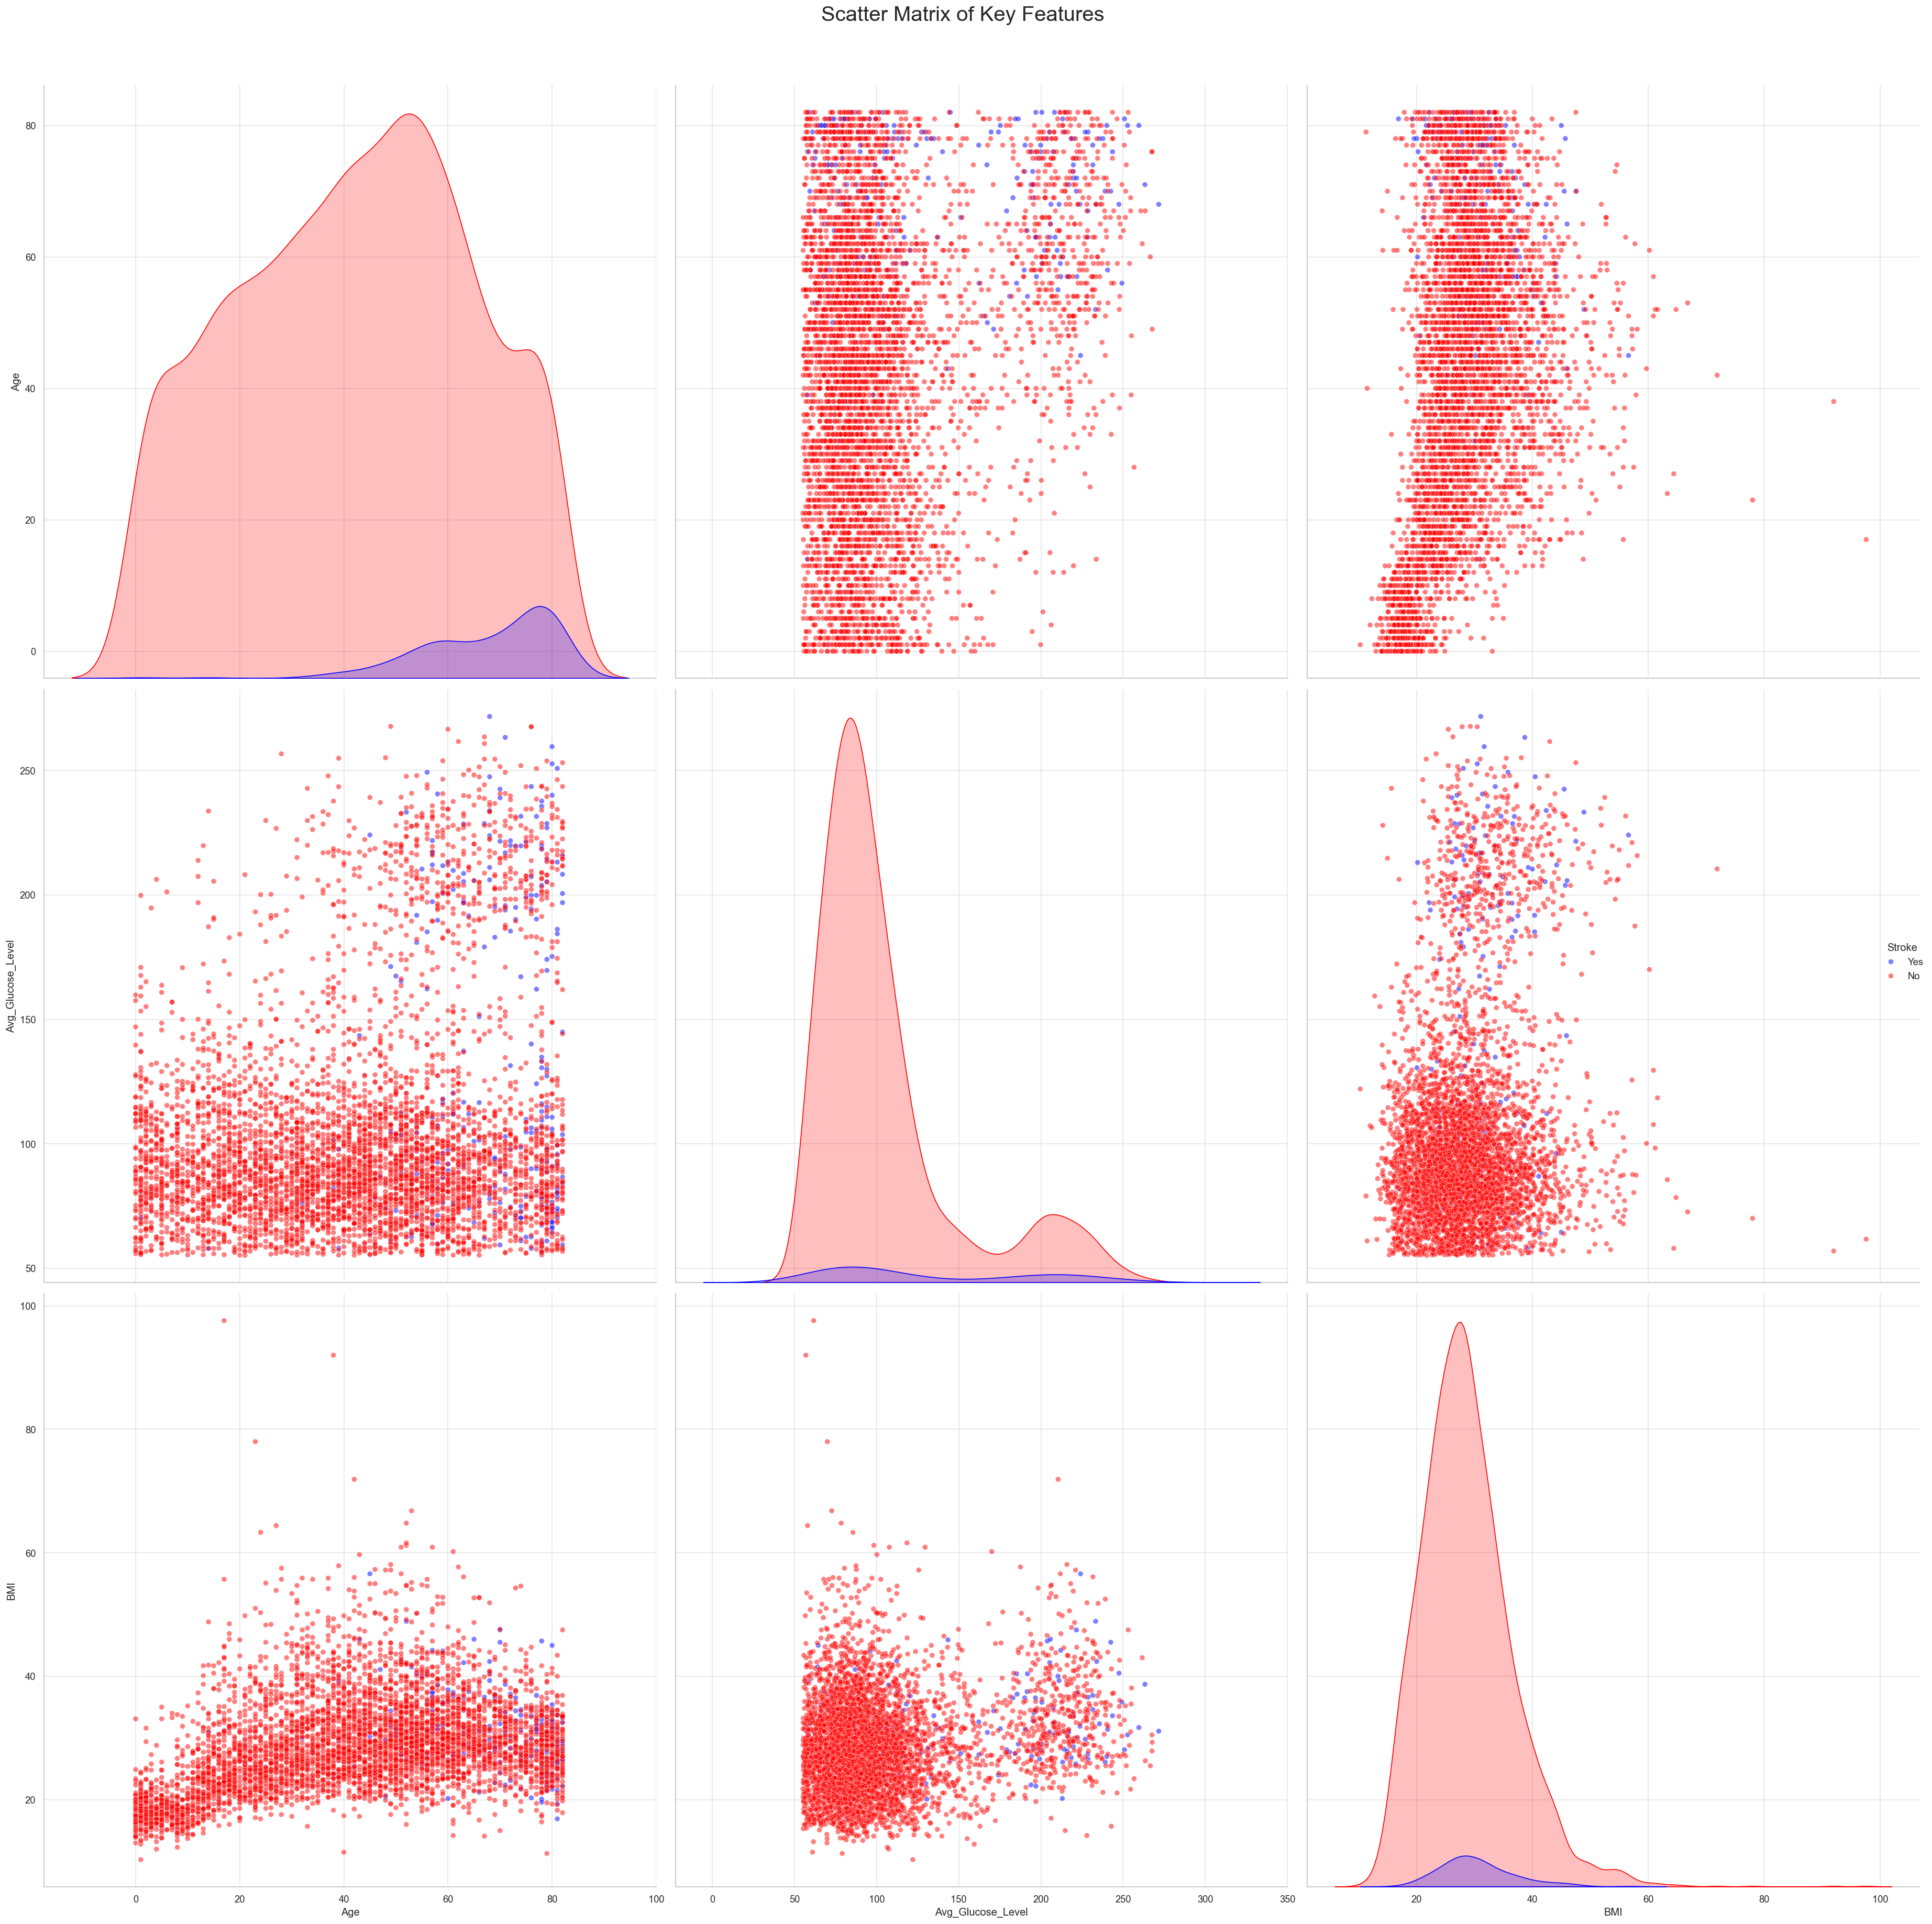

In [23]:
# This is PairPlot: Scatter matrix of Age, Glucose Level, BMI (colored by Stroke)

features = ['Age', 'Avg_Glucose_Level', 'BMI']
sns.pairplot(
    df[features + ['Stroke']],
    hue='Stroke',
    palette={"Yes": "blue", "No": "red"},
    diag_kind='kde',
    plot_kws={'alpha': 0.5},
    height=10
)
plt.suptitle("Scatter Matrix of Key Features", y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

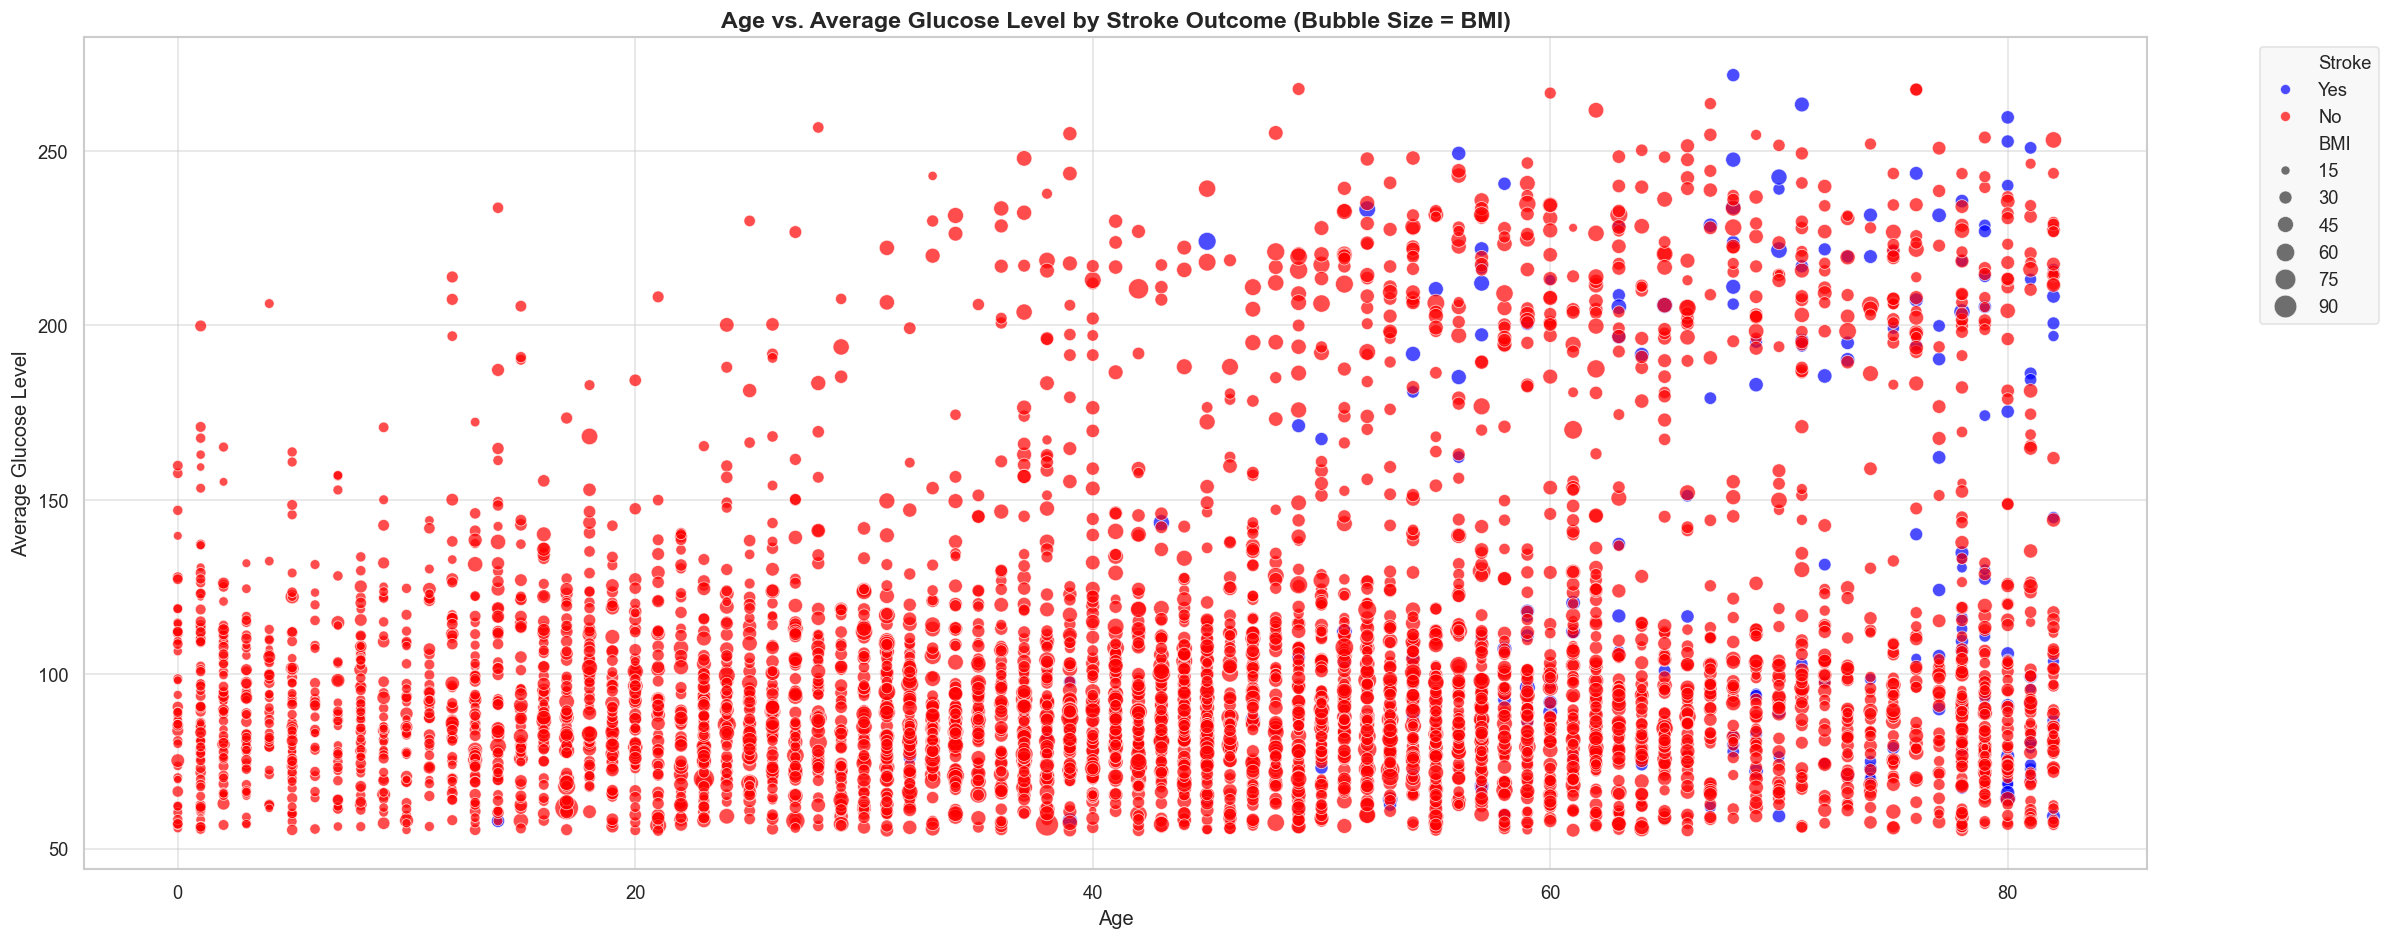

In [24]:
# Age vs. Average Glucose Level (bubble size = BMI), colored by stroke outcome

df_clean = df.dropna(subset=['BMI'])

plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=df_clean,
    x="Age",
    y="Avg_Glucose_Level",
    size="BMI",
    hue="Stroke",
    palette={"Yes": "blue", "No": "red"},
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Age vs. Average Glucose Level by Stroke Outcome (Bubble Size = BMI)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Glucose Level", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Correlation Analysis**
    - Heatmaps to visualize relationships between features

In [25]:
# Defining Correlation Analysis (for both categorical and numerical)

def correlation_heatmap(df, target):
    
    df_encoded = df.copy()
    
    cat_columns = df.select_dtypes(include=['object']).columns
    
    # encode
    encoder = LabelEncoder()
    for col in cat_columns:
        df_encoded[col] = encoder.fit_transform(df[col])
    
    # Calculate correlation with target
    correlations = df_encoded.corr()[target].sort_values(ascending=False)
    
    return correlations, df_encoded

In [26]:
correlations, df_encoded = correlation_heatmap(df, 'Stroke')

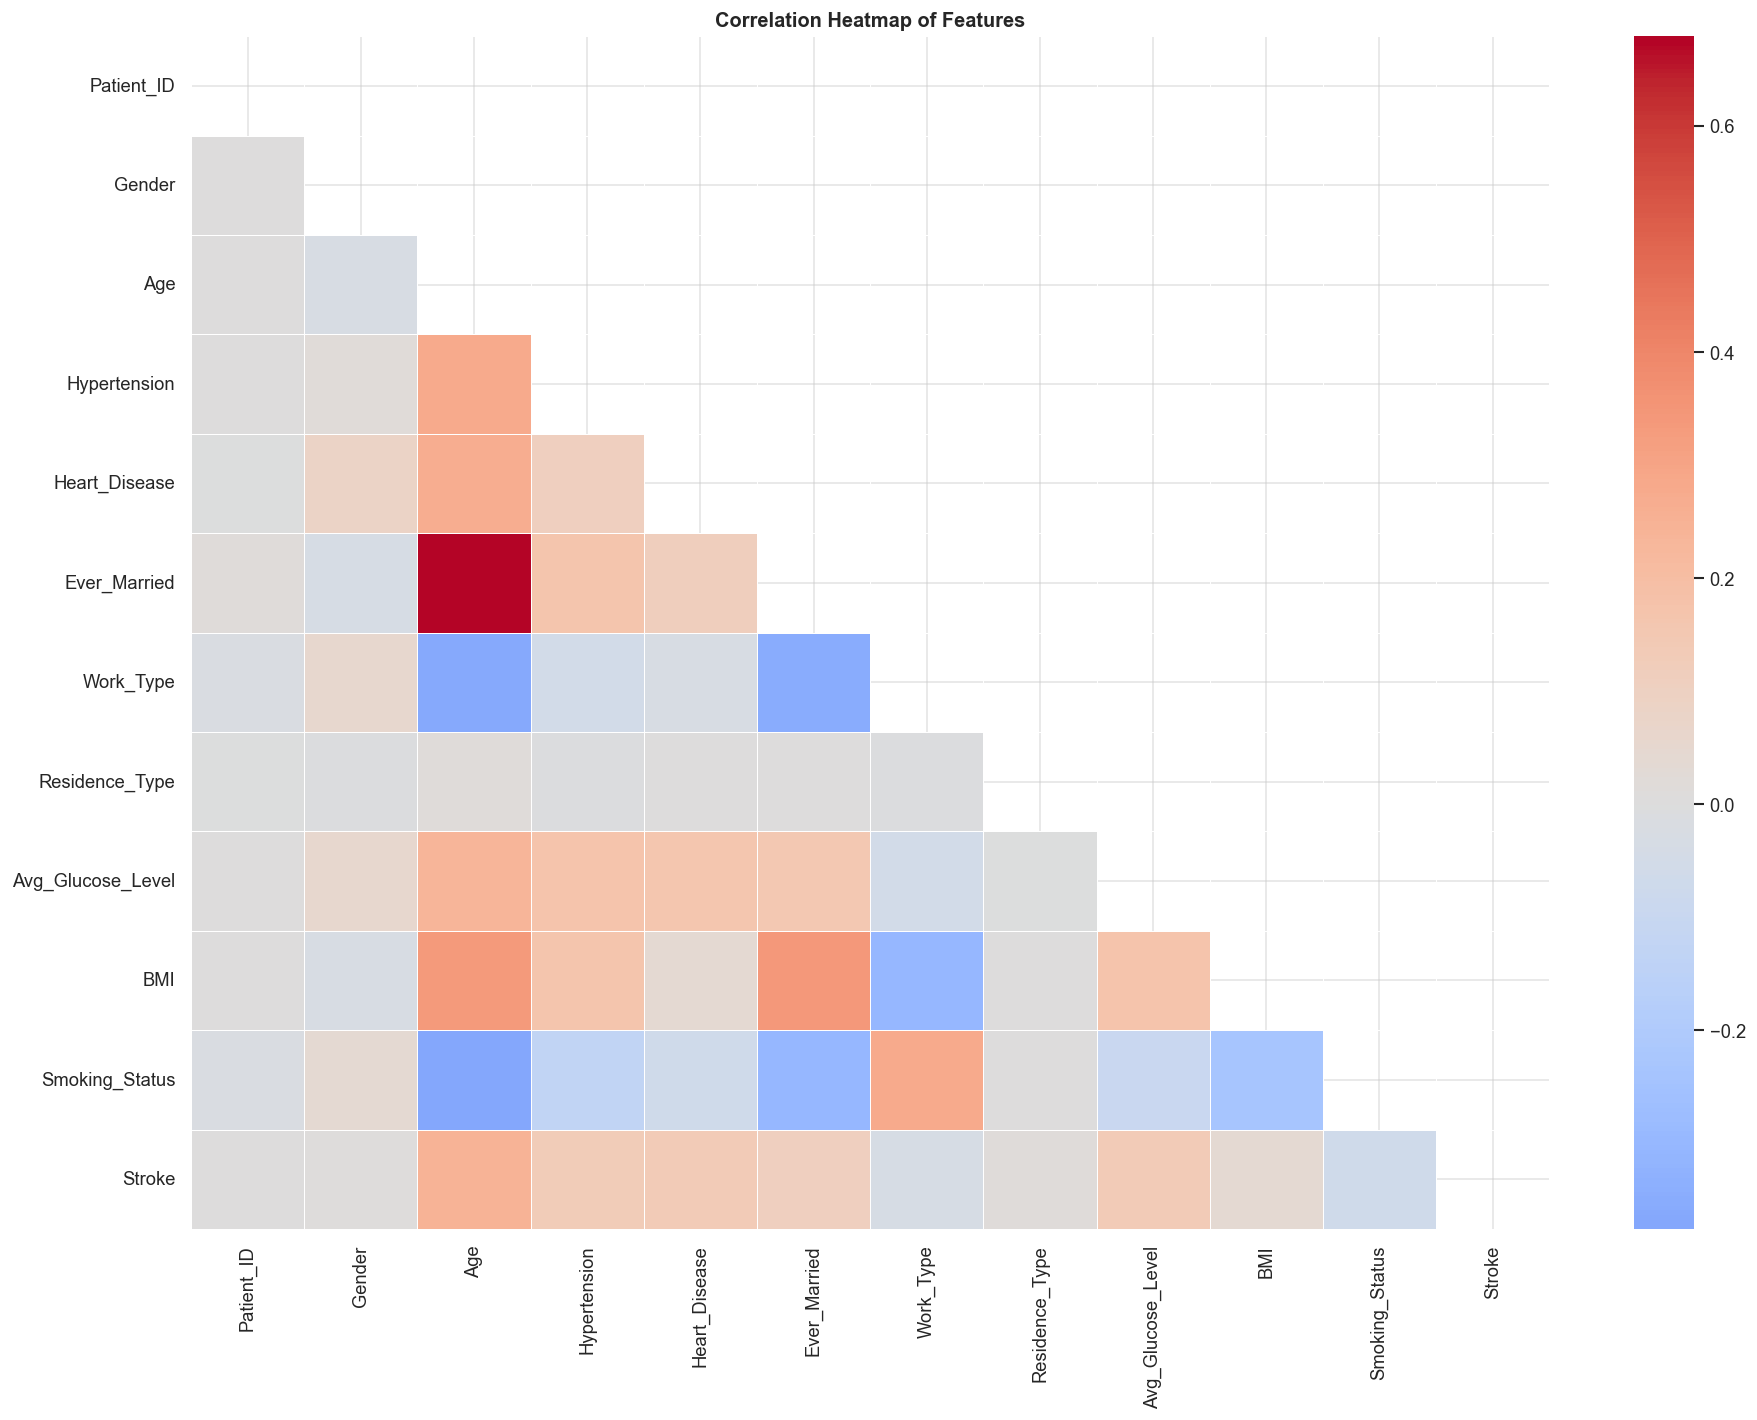

In [27]:
correlation_matrix = df_encoded.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True  # This will mask the upper triangle (so, it won't show up)

# Correlation Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=False, 
            center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

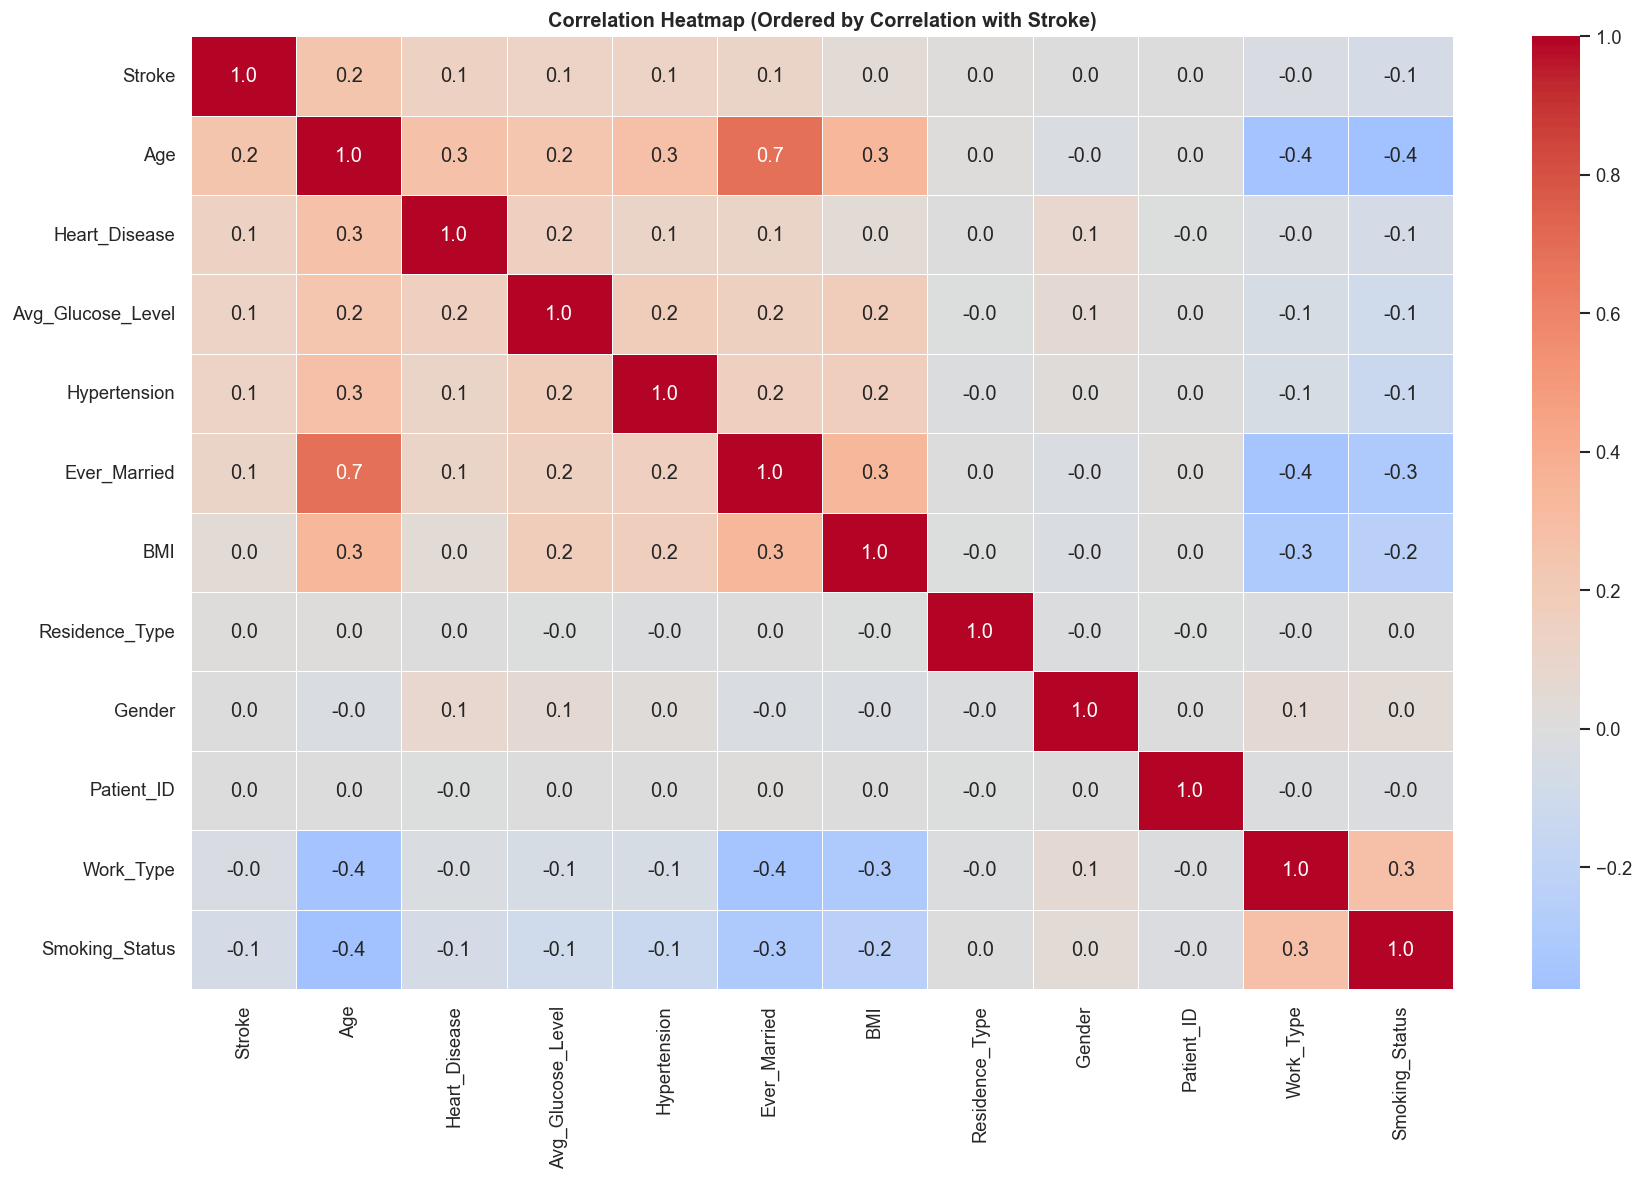

In [28]:
# Focus on correlations with target
top_corr_with_target = correlation_matrix['Stroke'].sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.loc[top_corr_with_target.index, top_corr_with_target.index], 
            annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.1f')
plt.title('Correlation Heatmap (Ordered by Correlation with Stroke)')
plt.tight_layout()
plt.show()

- **Comparative Analysis:**
    - Comparing multiple metrics across different categories
    - Displaying differences in outcomes based on multiple factors

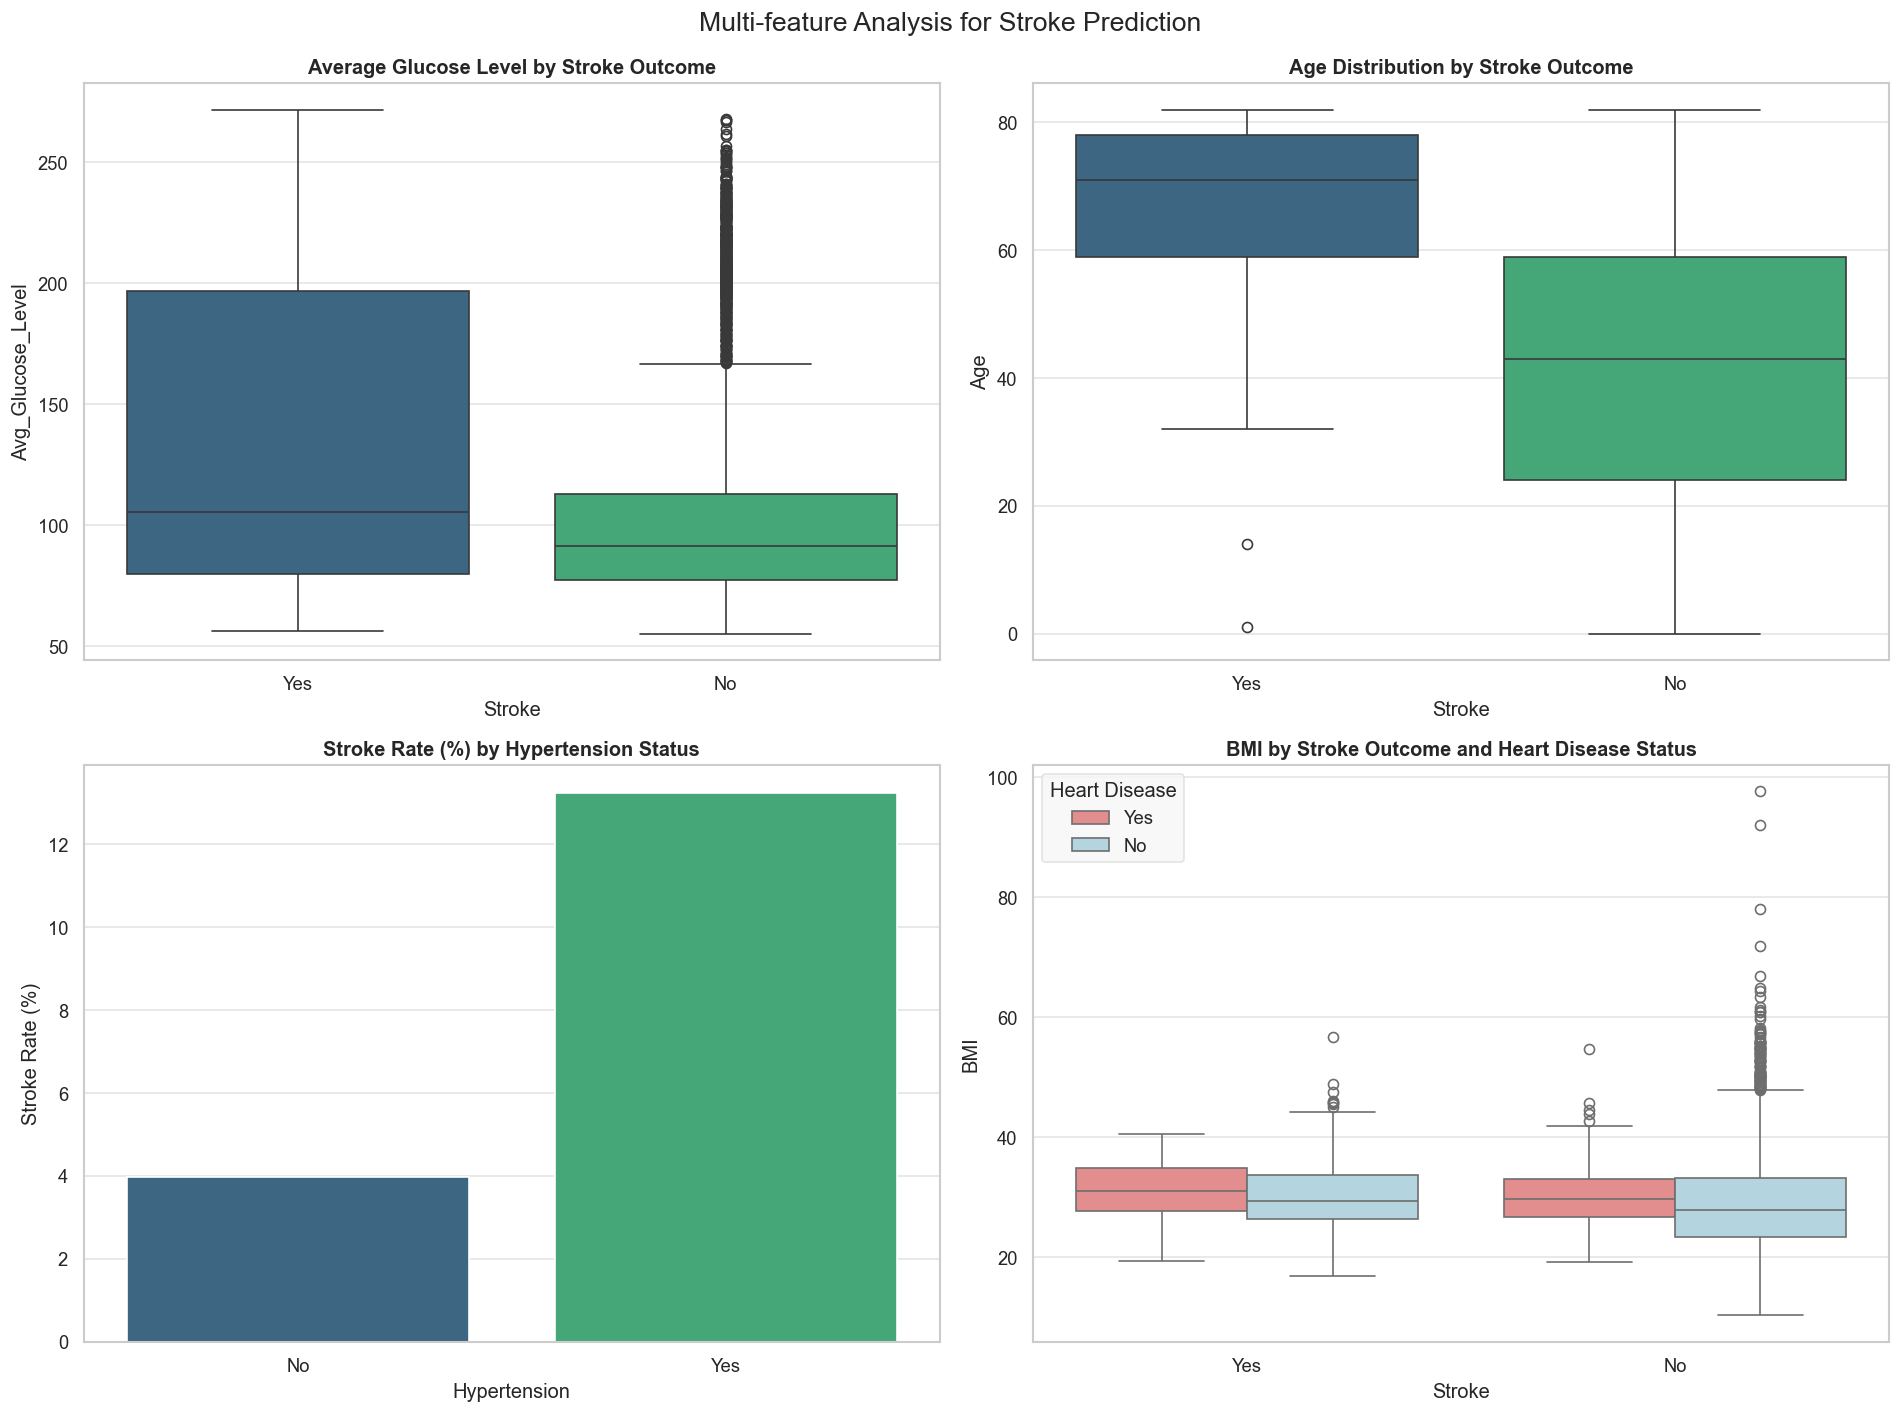

In [33]:
# Multi-feature Analysis, Key features by Stroke outcome

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, figure=fig)

# Average Glucose Level by Stroke outcome
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(
    data=df,
    x="Stroke",
    y="Avg_Glucose_Level",
    ax=ax1,
    palette="viridis"
)
ax1.set_title("Average Glucose Level by Stroke Outcome", fontsize=12)

# Age distribution by Stroke outcome
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(
    data=df,
    x="Stroke",
    y="Age",
    ax=ax2,
    palette="viridis"
)
ax2.set_title("Age Distribution by Stroke Outcome", fontsize=12)

# Stroke rate by Hypertension
ax3 = fig.add_subplot(gs[1, 0])
stroke_by_hypertension = df.groupby('Hypertension')['Stroke'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()
sns.barplot(
    data=stroke_by_hypertension,
    x="Hypertension",
    y="Stroke",
    ax=ax3,
    palette="viridis"
)
ax3.set_title("Stroke Rate (%) by Hypertension Status", fontsize=12)
ax3.set_ylabel("Stroke Rate (%)")

# BMI by Stroke outcome and Heart Disease status
ax4 = fig.add_subplot(gs[1, 1])
sns.boxplot(
    data=df.dropna(subset=['BMI']),  # Handle missing BMI values (BMI has null values)
    x="Stroke",
    y="BMI",
    hue="Heart_Disease",
    ax=ax4,
    palette={"Yes": "lightcoral", "No": "lightblue"}
)
ax4.set_title("BMI by Stroke Outcome and Heart Disease Status", fontsize=12)
ax4.legend(title="Heart Disease")

plt.suptitle("Multi-feature Analysis for Stroke Prediction", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

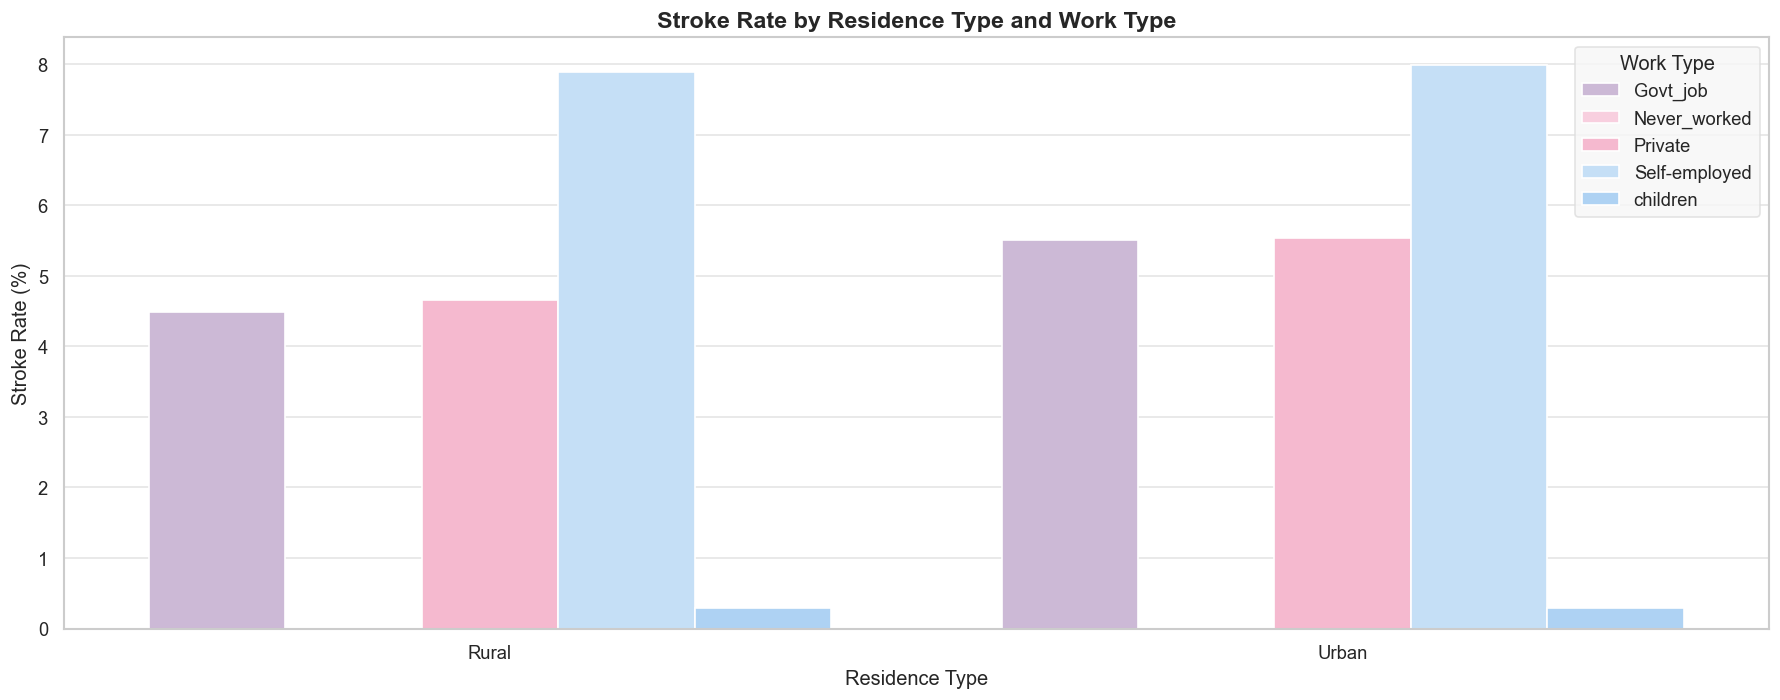

In [34]:
# Stroke rates by residence type and work type

plt.figure(figsize=(15, 6))
stroke_by_residence_work = df.groupby(['Residence_Type', 'Work_Type'])['Stroke'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index()

sns.barplot(
    data=stroke_by_residence_work,
    x="Residence_Type",
    y="Stroke",
    hue="Work_Type"
)
plt.title("Stroke Rate by Residence Type and Work Type", fontsize=14)
plt.xlabel("Residence Type", fontsize=12)
plt.ylabel("Stroke Rate (%)", fontsize=12)
plt.legend(title="Work Type")
plt.tight_layout()
plt.show()

- **Association Analysis:**
    - **Cramer's V** for visualizing the strength of associations between categorical variables
    - **Random Forest** for feature importance analysis and visualization
    - **Chi-Square** for target-relative feature importance analysis and visualization

**Cramer's V:**

In [35]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    # This handles division by zero
    denominator = min((kcorr-1), (rcorr-1))
    if denominator == 0:
        return 0
    return np.sqrt(phi2corr / denominator)

In [36]:
def calculate_cramers_v(df, categorical_columns):
    
    corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
        
    # Fill corr matrix
    for i in categorical_columns:
        for j in categorical_columns:
            if i == j:
                corr_matrix.loc[i, j] = 1.0
            else:
                corr_matrix.loc[i, j] = cramers_v(df[i], df[j])
    
    return corr_matrix.astype(float)  # Convert to float because we need it for heatmap

In [37]:
feature_associations = []

# Calculate Cramer's V correlations
cat_corr = calculate_cramers_v(df, categorical_features)

# Get top associations
flat_corr = [(i, j, cat_corr.loc[i, j]) for i in categorical_features for j in categorical_features if i != j]
sorted_associations = sorted(flat_corr, key=lambda x: x[2], reverse=True)[:10]

# Format and store the associations
for i, j, v in sorted_associations:
    feature_associations.append(f"{i} - {j}: ({v:.4f})")

In [38]:
print("Top 5 strongest associations:")
print_list(feature_associations)

Top 5 strongest associations:


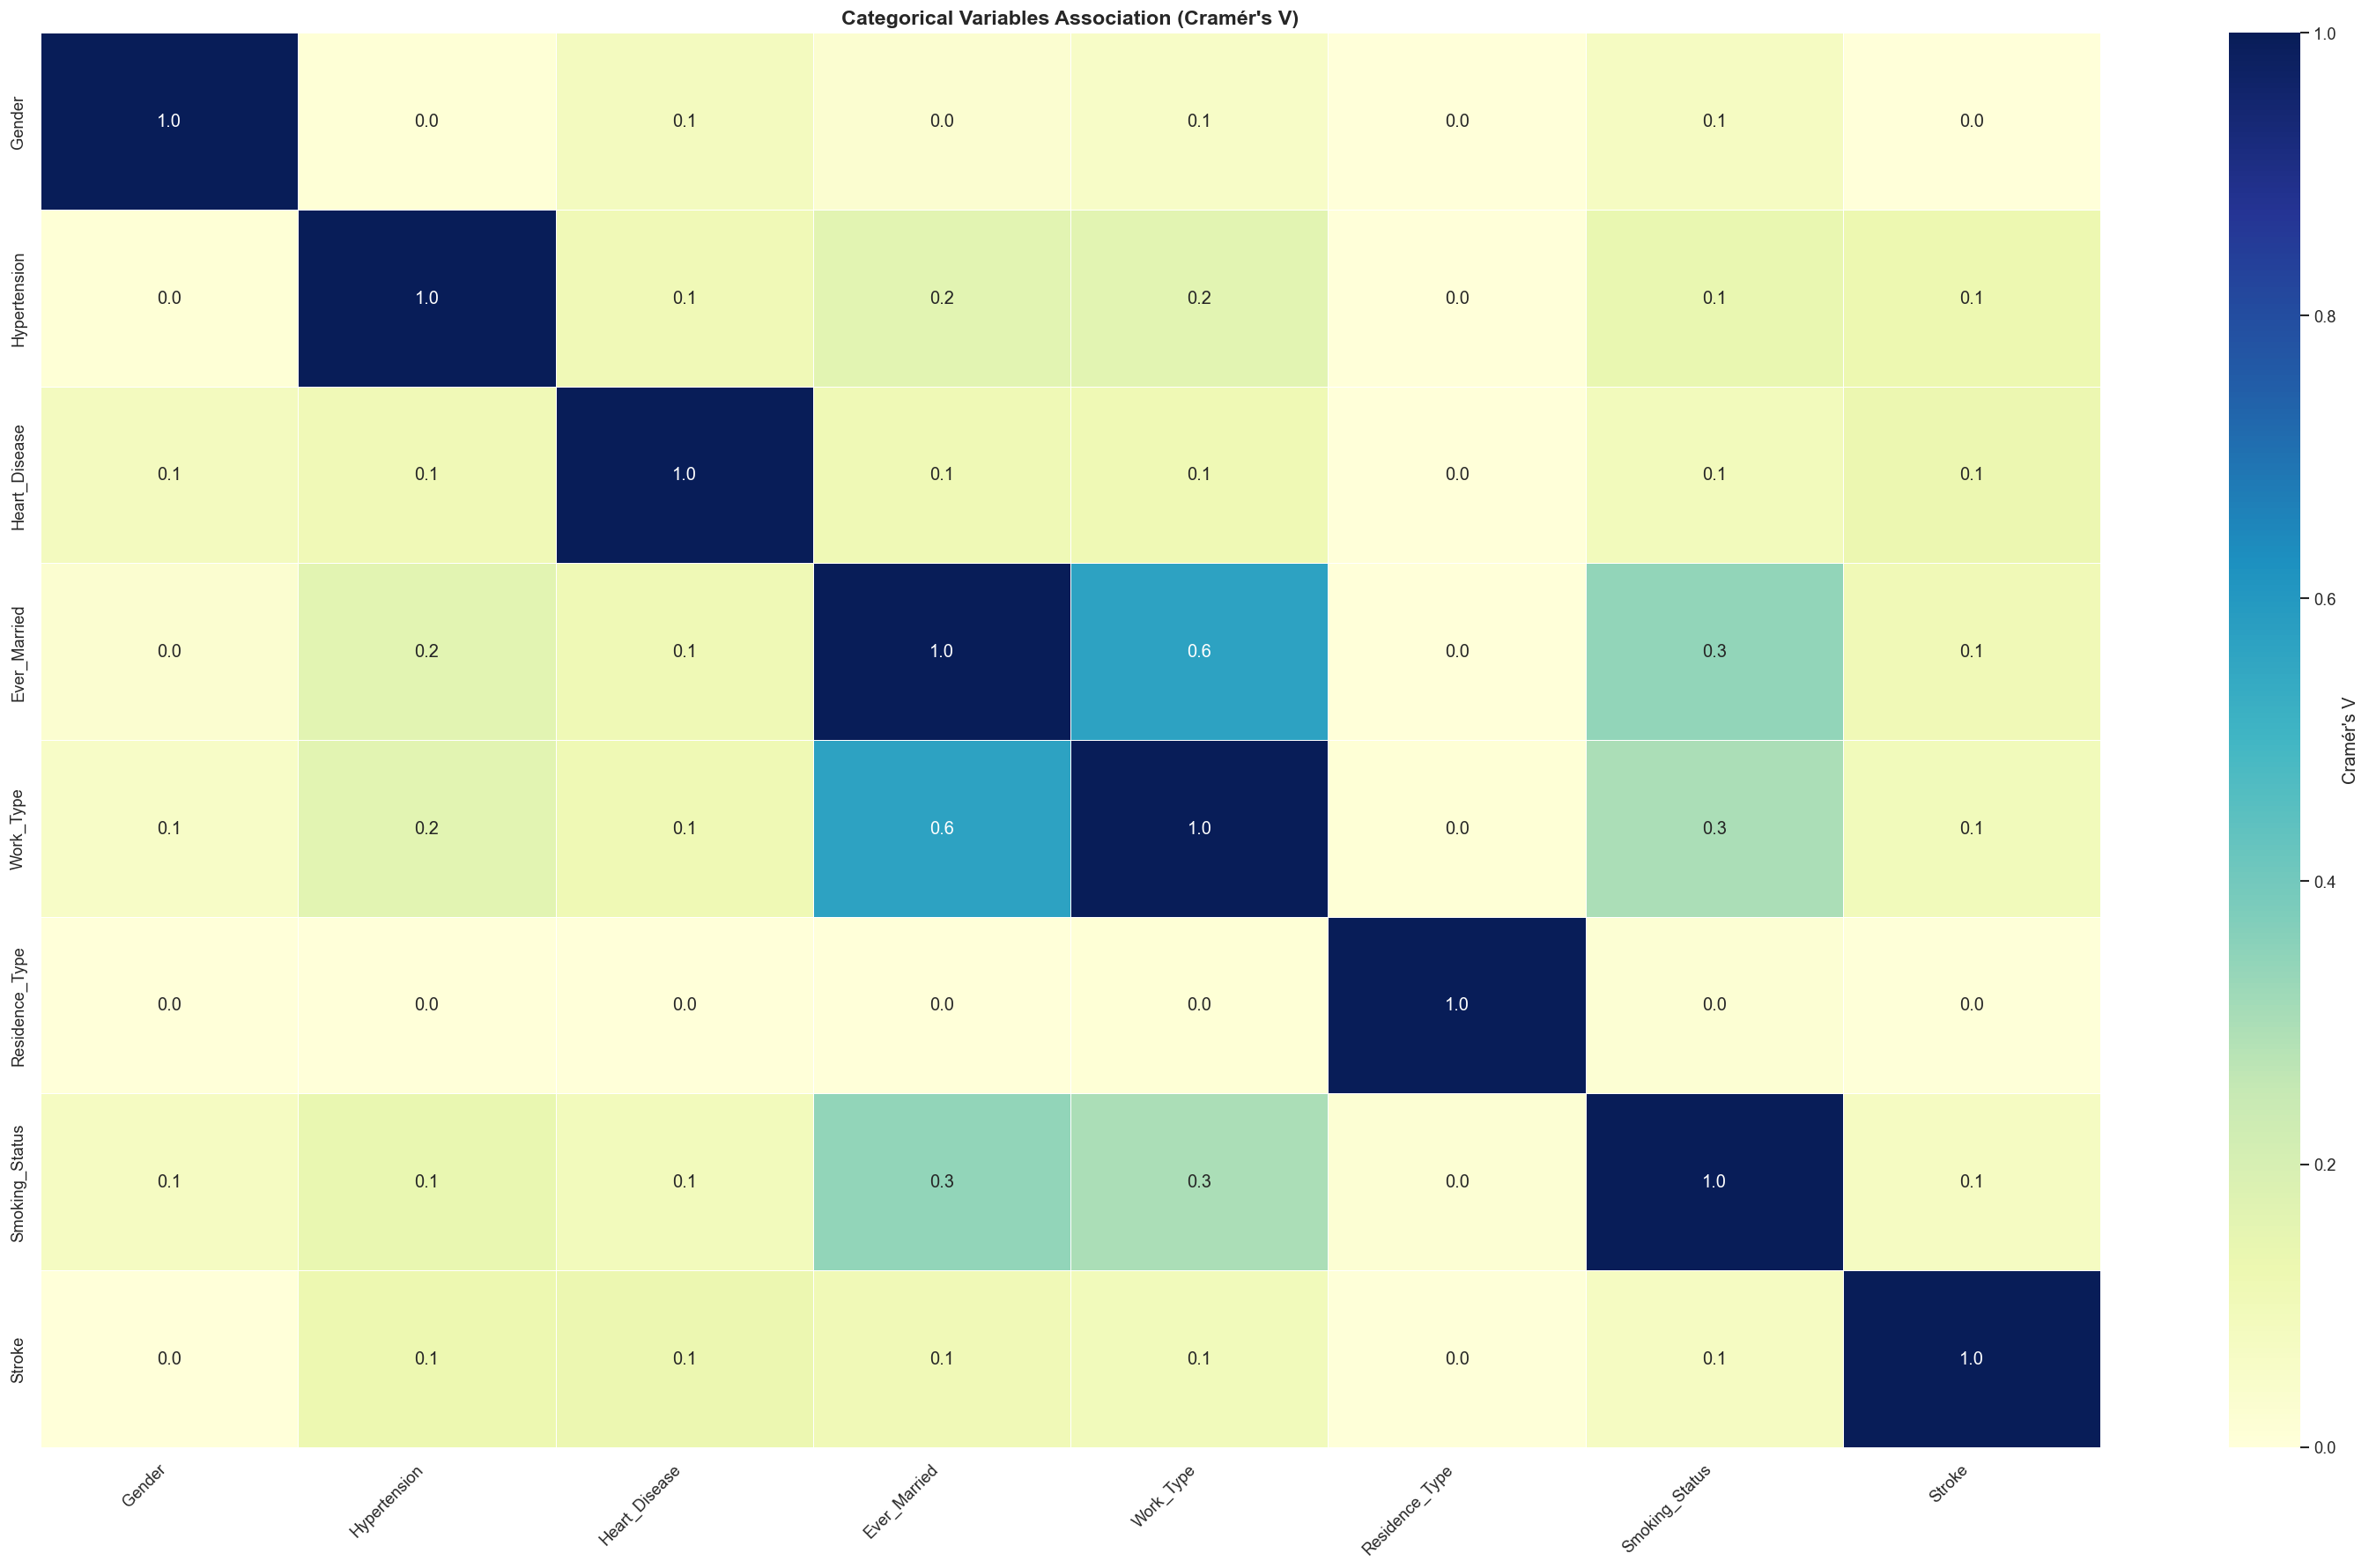

In [39]:
plt.figure(figsize=(25, 15))
sns.heatmap(cat_corr, annot=True, fmt='.1f', cmap='YlGnBu', vmin=0, vmax=1, linewidths=0.5, cbar_kws={'label': 'Cramér\'s V'})
plt.title("Categorical Variables Association (Cramér's V)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Random Forest:**

In [40]:
# (It's just for quickly checking feature importance)

df_clean = df.copy()

df_clean = df_clean.drop(columns=['Patient_ID'])
X = df_clean.drop(columns=['Stroke'])
y = df_clean['Stroke']

# Encode cat features
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

del df_clean  # Free up memory (As we don't need it anymore)

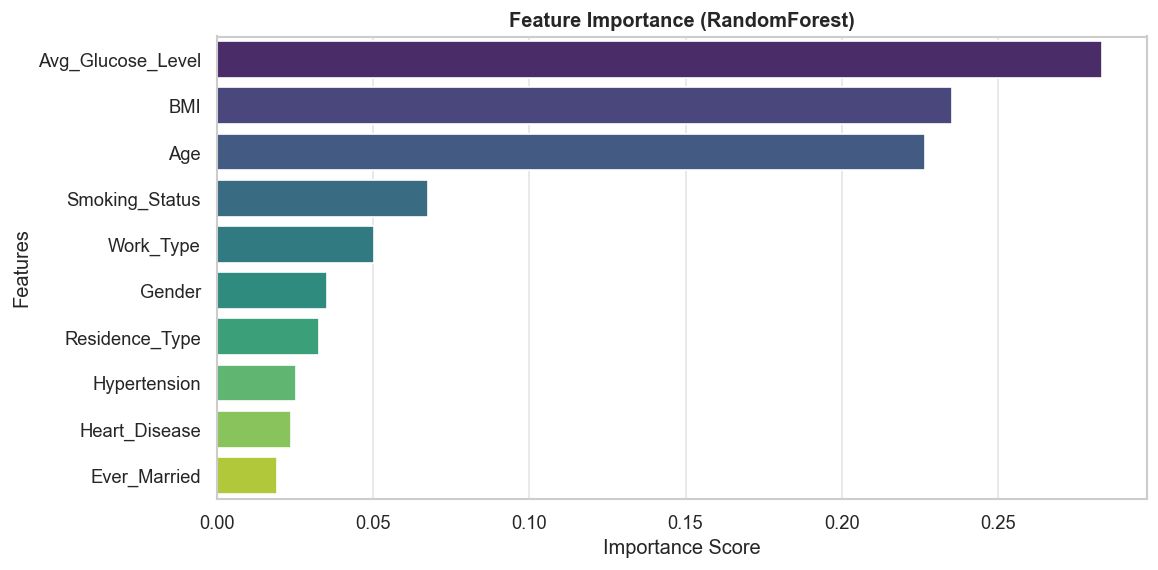

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (RandomForest)")
plt.show()

# Display feature importances
df_feature_importances(importances)

**Chi-Square:**

In [42]:
def chi_square_importance(df, target, categorical_features_list):
    results = {'Feature': [], 'Chi-Square': [], 'P-Value': []}
    
    cat_features = categorical_features_list.copy()
    cat_features.remove(target)  # Excluding 'Stroke' as it's our target variable

    for feature in cat_features:
        contingency = pd.crosstab(df[feature], df[target])
        chi2, p, _, _ = chi2_contingency(contingency)
        
        results['Feature'].append(feature)
        results['Chi-Square'].append(chi2)
        results['P-Value'].append(p)
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Chi-Square', ascending=False)
    
    return results_df

In [43]:
chi_results = chi_square_importance(df, 'Stroke', categorical_features)

# Uncomment following to see all features (if you want to..)
#chi_results.T

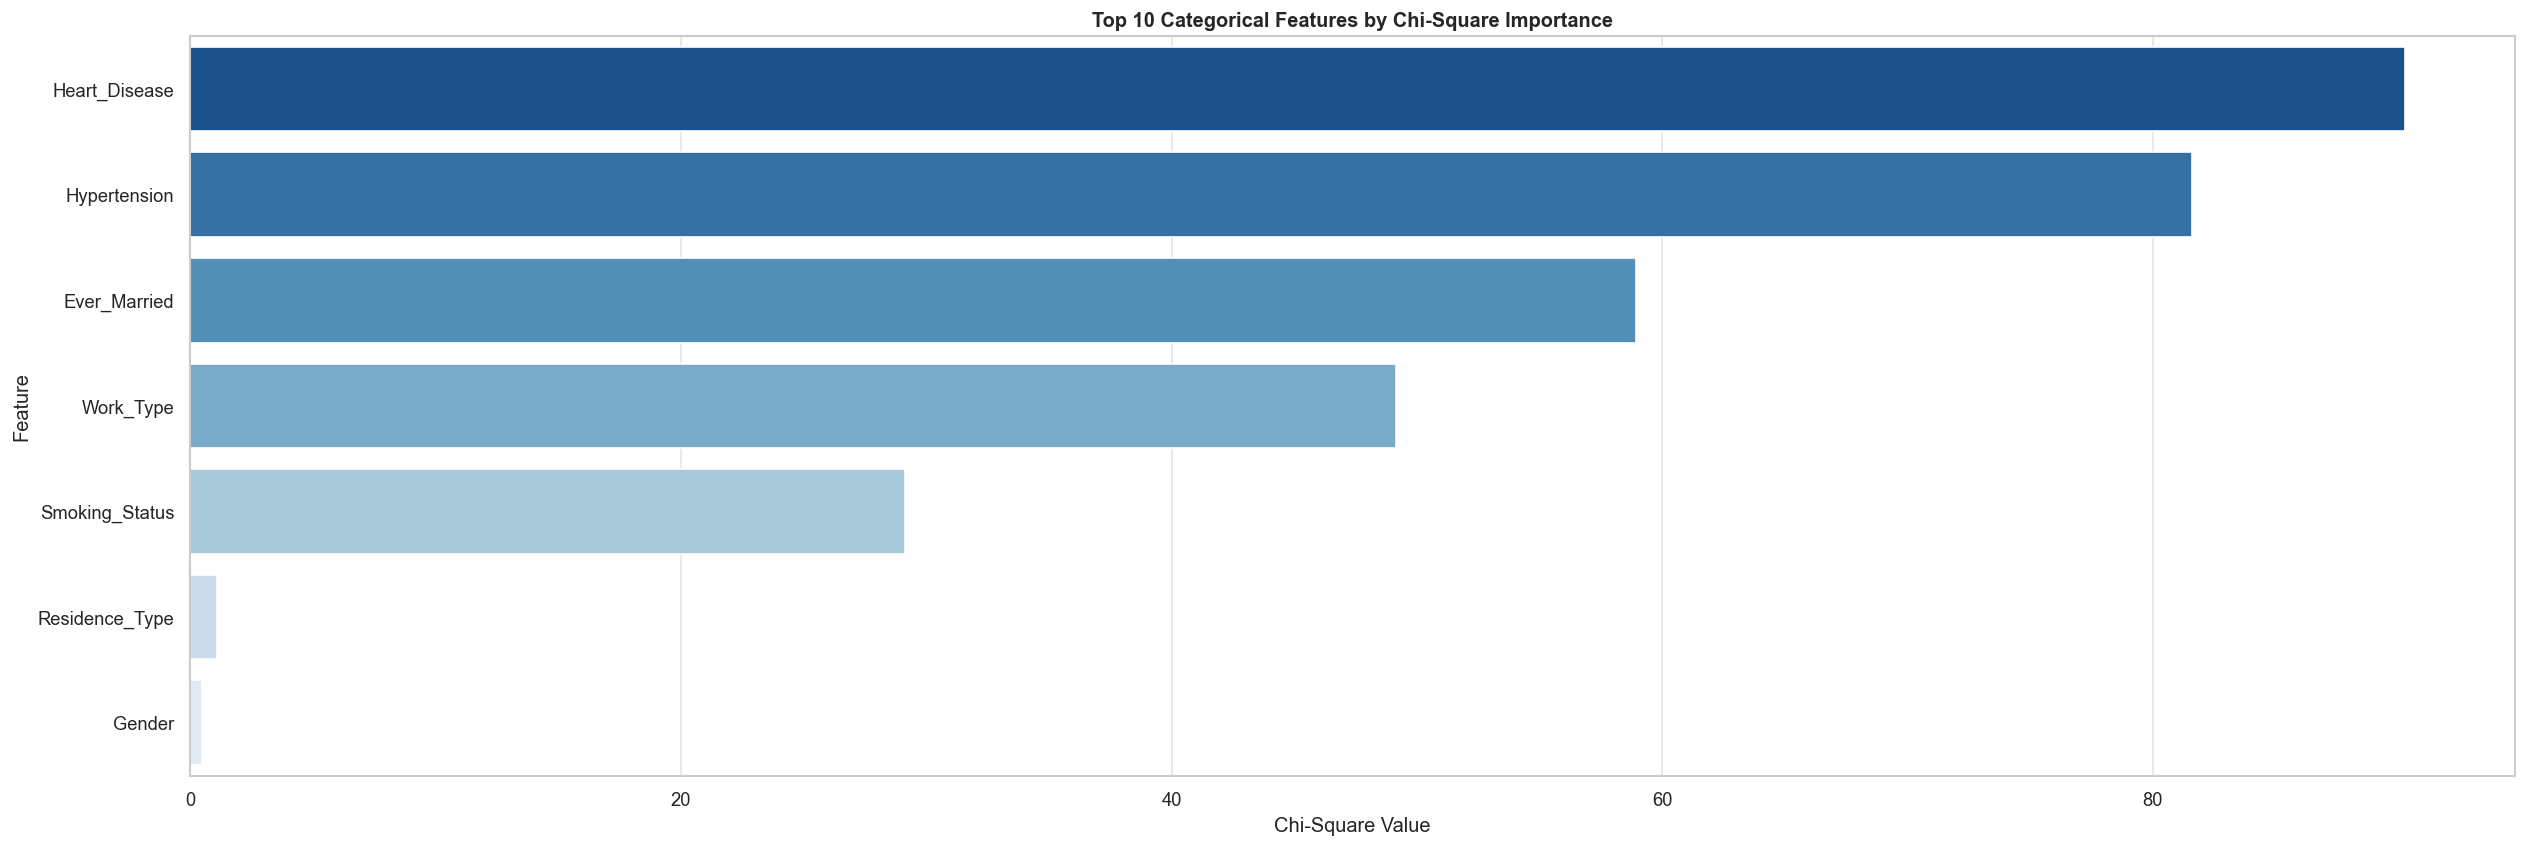

In [44]:
# Plot for Chi-Square scores
sns.barplot(x=chi_results['Chi-Square'][:10], y=chi_results['Feature'][:10], palette='Blues_r') # [:10] means we'll be only showing top 10s
plt.xlabel('Chi-Square Value')
plt.ylabel('Feature')
plt.title('Top 10 Categorical Features by Chi-Square Importance')
plt.show()

---

## **Phase 2:** Data Preprocessing & Feature Engineering
##### Objective: Prepare data by handling missing values, outliers, and inconsistencies.

### **Dataset Cleaning**

In [45]:
df.drop(columns=['Patient_ID'], inplace=True) # Removing this as we dont need this ones
numerical_features.remove('Patient_ID')

In [46]:
df.drop(df[df['Gender'] == 'Other'].index, inplace=True) # There's only one entry, It wouldn't affact that much..

In [47]:
# Check for null values in each column
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]  # This will only counts columns with null values
total_nulls = null_counts.sum()

if not columns_with_nulls.empty: print("Columns with null values:\n", columns_with_nulls)
print("\nTotal Null values in entire Dataset:", total_nulls)
print("Duplicated Rows in entire Dataset:", df.duplicated().sum())


Columns with null values:
 BMI    201
dtype: int64

Total Null values in entire Dataset: 201
Duplicated Rows in entire Dataset: 0


- **Duplicates:** No duplicate rows were found in the dataset.  
- **Handling Missing Values:**  
  - **Approach:** K-Nearest Neighbors (KNN) Imputation
 


In [48]:
# KNN estimates missing values based on the nearest data points, I think it would be best if I use it here 
def KNN_Impute(df, target, correlate_features):

    numeric_columns = correlate_features  # Selecting these because they may correlate with the target
    imputer = KNNImputer(n_neighbors=5)

    impute_data = df[numeric_columns].copy()

    # Apply KNN imputation
    imputed_values = imputer.fit_transform(impute_data)

    # This updates target column with imputed values
    idx = numeric_columns.index(target)
    df[target] = imputed_values[:, idx]

    return print(f"{target} Imputation Done!")

In [49]:
KNN_Impute(df, 'BMI', ['Age', 'Avg_Glucose_Level', 'BMI'])

# To Verify imputation, Run code block (The one that checks for null values) again, (I'm too lazy to write code again..)

BMI Imputation Done!


- **Now, lets focus on Age:**
    - Age is starting from 0, which is pretty unrealistic
    - I'll use KNN Again

In [50]:
# First, Lets identify the problematic Age entries
threshold = 10
unrealistic_Age = df['Age'] < threshold
print(f"Unrealistic Age counts (Less then {threshold} Years): {unrealistic_Age.sum()}")

Unrealistic Age counts (Less then 10 Years): 472


In [51]:
# Removing these values

df.loc[unrealistic_Age, 'Age'] = np.nan

In [52]:
KNN_Impute(df, 'Age', ['Age', 'Avg_Glucose_Level', 'BMI'])

# (You know what to do next...)

Age Imputation Done!


### **Outlier Detection & Cleaning**

- For Detecting Outliers, we will use:
    - IQR Method
    - Z-Score Method

**Z-Score Method**:

In [53]:
def z_score_outliers(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    outlier_values = df.loc[outlier_indices, column].values
    return {
        'column': column,
        'method': 'Z-Score',
        'threshold': threshold,
        'outlier_count': len(outlier_indices),
        'outlier_percentage': (len(outlier_indices) / len(df)) * 100,
        'outlier_indices': outlier_indices,
        'outlier_values': outlier_values
    }

In [55]:
# This will create a summary DataFrame of Z-score outliers
def z_score_summary_table(df, numerical_features, threshold=3):

    results = []
    
    for column in numerical_features:
        outlier_info = z_score_outliers(df, column, threshold)
        
        column_stats = {
            'Feature': column,
            'Min': df[column].min(),
            'Max': df[column].max(),
            'Lower Threshold': df[column].mean() - threshold * df[column].std(),
            'Upper Threshold': df[column].mean() + threshold * df[column].std(),
            'Outliers Count': outlier_info['outlier_count'],
            'Outliers (%)': round(outlier_info['outlier_percentage'], 2),
            'Range Impact': 'High' if outlier_info['outlier_percentage'] > 5 else 'Medium' if outlier_info['outlier_percentage'] > 1 else 'Low'
        }
        
        results.append(column_stats)
    
    
    summary_df = pd.DataFrame(results)
    summary_df = summary_df.sort_values('Outliers (%)', ascending=False)
    
    # Format the numeric columns (rounding values)
    for col in ['Min', 'Max', 'Lower Threshold', 'Upper Threshold']:
        summary_df[col] = summary_df[col].round(2)

    return summary_df

In [56]:
z_score_summary = z_score_summary_table(df, numerical_features)

z_score_summary

Feature    Min     Max  Lower Threshold  Upper Threshold  \
2                BMI  10.30   97.60             5.65            52.24   
1  Avg_Glucose_Level  55.12  271.74           -29.71           242.00   
0                Age  10.00   82.00           -13.02           104.70   

   Outliers Count  Outliers (%) Range Impact  
2              59          1.15       Medium  
1              49          0.96          Low  
0               0          0.00          Low

**IQR Method:**

In [57]:
def iqr_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_indices = np.where(outlier_mask)[0]
    outlier_values = df.loc[outlier_indices, column].values
    
    return {
        'column': column,
        'method': 'IQR',
        'multiplier': multiplier,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outlier_indices),
        'outlier_percentage': (len(outlier_indices) / len(df)) * 100,
        'outlier_indices': outlier_indices,
        'outlier_values': outlier_values
    }

In [59]:
# This code is almost same as Z-Score..

def iqr_summary_table(df, numerical_features, multiplier=1.5):
    
    results = []
    
    for column in numerical_features:
        outlier_info = iqr_outliers(df, column, multiplier)
        
        column_stats = {
            'Feature': column,
            'Min': df[column].min(),
            'Max': df[column].max(),
            'Q1': outlier_info['Q1'],
            'Q3': outlier_info['Q3'],
            'IQR': outlier_info['IQR'],
            'Lower Bound': outlier_info['lower_bound'],
            'Upper Bound': outlier_info['upper_bound'],
            'Outliers Count': outlier_info['outlier_count'],
            'Outliers (%)': round(outlier_info['outlier_percentage'], 2),
            'Range Impact': 'High' if outlier_info['outlier_percentage'] > 5 else 'Medium' if outlier_info['outlier_percentage'] > 1 else 'Low'
        }
        
        results.append(column_stats)
    
    summary_df = pd.DataFrame(results)
    summary_df = summary_df.sort_values('Outliers (%)', ascending=False)
    
    for col in ['Min', 'Max', 'Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound']:
        summary_df[col] = summary_df[col].round(2)

    return summary_df

In [60]:
iqr_summary = iqr_summary_table(df, numerical_features)

# Display Df
iqr_summary

Feature    Min     Max     Q1      Q3    IQR  Lower Bound  \
1  Avg_Glucose_Level  55.12  271.74  77.24  114.09  36.85        21.96   
2                BMI  10.30   97.60  23.70   33.00   9.30         9.75   
0                Age  10.00   82.00  30.00   61.00  31.00       -16.50   

   Upper Bound  Outliers Count  Outliers (%) Range Impact  
1       169.36             627         12.27         High  
2        46.95             118          2.31       Medium  
0       107.50               0          0.00          Low

### **Handling Outliers**

- To Handle Outliers, We'll Use:
    - Winsorization

In [61]:
# Define lower and upper bounds for capping
glucose_lower, glucose_upper = 21.98, 169.35 # (correct IQR calculation was 169.36)
bmi_lower, bmi_upper = 9.75, 46.95

# Applying Winsorization
df['Avg_Glucose_Level'] = df['Avg_Glucose_Level'].clip(lower=glucose_lower, upper=glucose_upper)
df['BMI'] = df['BMI'].clip(lower=bmi_lower, upper=bmi_upper)

# Verify the changes, just run Z-Score & IQR again..

---

### **Feature Engineering**

- We will use:
    - Data Type Conversion
    - Categorical Encoding
    - Feature Creation & Transformation
    - Pipeline Execution

In [62]:
# Lets quickly check our lists one last time

print("Columns with Numerical Data:")
print_list(numerical_features)

print("\nColumns with Categorical Data:")
print_list(categorical_features)

Columns with Numerical Data:



Columns with Categorical Data:


**Data Type Conversion:**

In [63]:
# Data Type Conversion, Convert features to appropriate data types.
def convert_data_types(df, numerical_features_list, categorical_features_list):
    
    processed_df = df.copy()
    num_features = numerical_features_list
    cat_features = categorical_features_list

    # Convert numerical features to numeric type
    processed_df[num_features] = processed_df[num_features].apply(pd.to_numeric)
    
    # Convert categorical features to category type (Objects etc)
    processed_df[cat_features] = processed_df[cat_features].astype('category')
    
    return processed_df

**Categorical Encoding:**

In [64]:
def encode_categorical_features(df):
    
    processed_df = df.copy()


    # Convert binary categorical variables to 0/1
    
    # Yes/No mapping
    yes_no_features = ['Hypertension', 'Heart_Disease', 'Ever_Married', 'Stroke']
    
    for feature in yes_no_features:
        processed_df[f'{feature}_Binary'] = processed_df[feature].map({
            'Yes': 1, 
            'No': 0
            }).astype(int)
    
    # Mapping
    processed_df['Gender_Binary'] = processed_df['Gender'].map({
        'Male': 0, 'Female': 1}).astype(int)
    
    processed_df['Residence_Type_Binary'] = processed_df['Residence_Type'].map({
        'Urban': 0, 'Rural': 1}).astype(int)
    
    

    # One-hot encode nominal categorical variables
    nominal_features = ['Work_Type', 'Smoking_Status']
    
    processed_df = pd.get_dummies(processed_df, columns=nominal_features, 
                                drop_first=False, prefix_sep='_')
    
    return processed_df

**Feature Creation & Transformation:**

In [65]:
def engineer_features(df):

    processed_df = df.copy()
    
    # Create age groups
    age_bins = [0, 45, 60, 75, 100]
    age_labels = ['<45', '45-60', '61-75', '>75']
    processed_df['Age_Group'] = pd.cut(processed_df['Age'], bins=age_bins, labels=age_labels)
    processed_df['Age_Group'] = processed_df['Age_Group'].astype('category')
    
    # BMI categories
    bmi_bins = [0, 18.5, 25, 30, 100]
    bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
    processed_df['BMI_Category'] = pd.cut(processed_df['BMI'], 
                                         bins=bmi_bins, labels=bmi_labels)
    processed_df['BMI_Category'] = processed_df['BMI_Category'].astype('category')
    
    # Create glucose level categories
    glucose_bins = [0, 100, 126, 300]
    glucose_labels = ['Normal', 'Prediabetic', 'Diabetic']
    processed_df['Glucose_Category'] = pd.cut(processed_df['Avg_Glucose_Level'], 
                                            bins=glucose_bins, labels=glucose_labels)
    processed_df['Glucose_Category'] = processed_df['Glucose_Category'].astype('category')
    
    # Derived risk variables
    processed_df['Cardiovascular_Risk'] = (
        processed_df['Hypertension_Binary'] + 
        processed_df['Heart_Disease_Binary']
    )
    
    processed_df['Metabolic_Risk'] = (
        (processed_df['BMI'] > 30).astype(int) + 
        (processed_df['Avg_Glucose_Level'] > 126).astype(int)
    )
    
    # Creating some more features
    processed_df['Age_Hypertension'] = processed_df['Age'] * processed_df['Hypertension_Binary']
    processed_df['BMI_Glucose'] = processed_df['BMI'] * (processed_df['Avg_Glucose_Level']/100)
    processed_df['Age_Heart'] = processed_df['Age'] * processed_df['Heart_Disease_Binary']
    
    processed_df['Vascular_Risk'] = (
        (processed_df['Age'] > 60).astype(int) + 
        processed_df['Hypertension_Binary'] +
        (processed_df['Avg_Glucose_Level'] > 110).astype(int)
    )
    
    # Lets, create lifestyle risk indicator
    smoking_risk = 0
    if 'Smoking_Status_formerly smoked' in processed_df.columns:
        smoking_risk += processed_df['Smoking_Status_formerly smoked']
    if 'Smoking_Status_smokes' in processed_df.columns:
        smoking_risk += 2 * processed_df['Smoking_Status_smokes']  # This weight current smoking more (+= 2)
        
    processed_df['Lifestyle_Risk'] = (
        smoking_risk + 
        (processed_df['BMI'] > 25).astype(int)
    )
    
    # One-hot encode the categorical groups (Newely created ones)
    group_features = ['Age_Group', 'BMI_Category', 'Glucose_Category']
    processed_df = pd.get_dummies(processed_df, columns=group_features, 
                                drop_first=False, prefix_sep='_')
    
    return processed_df

**Pipeline Execution:**

In [66]:
# Get categorical and numerical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float']).columns.tolist()

print("Columns with Numerical Data:")
print_list(numerical_features)

print("\nColumns with Categorical Data:")
print_list(categorical_features)

print("\nColumns Info:")
df_info(df)

Columns with Numerical Data:



Columns with Categorical Data:



Columns Info:


In [67]:
def preprocess_stroke_data(df, numerical_features, categorical_features):
    
    # Now, lets apply each  step sequentially
    df_typed = convert_data_types(df, numerical_features, categorical_features)
    df_encoded = encode_categorical_features(df_typed)
    df_processed = engineer_features(df_encoded)
    
    return df_processed

In [68]:
# Process...
processed_data = preprocess_stroke_data(df, numerical_features, categorical_features)

In [69]:
df_info(processed_data)

In [70]:
# Save as a Parquet file
processed_data.to_parquet("Datasets\\Processed_Stroke_Dataset.parquet", index=False)

___
---

## **Phase 3:** Model Development & Evaluation
##### Objective: Prepare data for M.L then develope and evalute the Machine Learning Models.

**Data Preparation:**

In [71]:
# This loads dataset from parquet file (In case we need it 😁)
processed_data = Load_Dataset('Datasets\Processed_Stroke_Dataset.parquet')

Dataset loaded successfully with 5109 rows and 42 columns
DataFrame Shape:  (5109, 42)


In [72]:
processed_data.head(3)

Gender   Age Hypertension Heart_Disease Ever_Married Residence_Type  \
0    Male  67.0           No           Yes          Yes          Urban   
1  Female  61.0           No            No          Yes          Rural   
2    Male  80.0           No           Yes          Yes          Rural   

   Avg_Glucose_Level    BMI Stroke  Hypertension_Binary  ...  Age_Group_45-60  \
0             169.35  36.60    Yes                    0  ...            False   
1             169.35  31.38    Yes                    0  ...            False   
2             105.92  32.50    Yes                    0  ...            False   

   Age_Group_61-75  Age_Group_>75  BMI_Category_Underweight  \
0             True          False                     False   
1             True          False                     False   
2            False           True                     False   

   BMI_Category_Normal  BMI_Category_Overweight  BMI_Category_Obese  \
0                False                    False                True   
1                False                    False                True   
2                False                    False                True   

   Glucose_Category_Normal  Glucose_Category_Prediabetic  \
0                    False                         False   
1                    False                         False   
2                    False                          True   

   Glucose_Category_Diabetic  
0                       True  
1                       True  
2                      False  

[3 rows x 42 columns]

In [73]:
def prepare_for_ml(processed_df, primary_target='Stroke_Binary', test_size=0.2, random_state=42):
    
    # Identify features by patterns
    binary_features = [col for col in processed_df.columns if col.endswith('_Binary')]
    
    onehot_features = [col for col in processed_df.columns 
                      if ('Work_Type_' in col or 'Smoking_Status_' in col 
                         or 'Age_Group_' in col or 'BMI_Category_' in col
                         or 'Glucose_Category_' in col)]
    
    derived_features = ['Cardiovascular_Risk', 'Metabolic_Risk', 'Vascular_Risk', 
                       'Lifestyle_Risk', 'Age_Hypertension', 'BMI_Glucose', 'Age_Heart']
    
    # Combine all..
    keep_features = binary_features + onehot_features + derived_features
    
    
    keep_features.remove(primary_target)
    
    # Extract target and features to x, y
    y = processed_df[primary_target].copy()
    X = processed_df[keep_features].copy()
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # Scale numerical features
    num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    scaler = StandardScaler()
    
    X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
    X_test_scaled[num_features] = scaler.transform(X_test[num_features])
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [74]:
# Prepare... (This one is important, I'll be using this in later parts)
X_train, X_test, y_train, y_test, scaler = prepare_for_ml(processed_data, primary_target='Stroke_Binary')

**Pre-Modeling Checks:**

In [75]:
# Quick feature importance check using Random Forest

# Train a simple model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top 10 features
print("Top 10 most important features:")
for i in range(min(10, X_train.shape[1])):
    print(f"{i+1}. {X_train.columns[indices[i]]}: {importances[indices[i]]:.4f}")

Top 10 most important features:
1. BMI_Glucose: 0.3466
2. Age_Hypertension: 0.0554
3. Residence_Type_Binary: 0.0529
4. Gender_Binary: 0.0464
5. Age_Heart: 0.0373
6. Vascular_Risk: 0.0322
7. Age_Group_>75: 0.0307
8. Work_Type_Private: 0.0296
9. Smoking_Status_Formerly Smoked: 0.0285
10. Smoking_Status_Never Smoked: 0.0274


In [76]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Initialize metrics storage
cv_scores = {
    'accuracy': [],
    'roc_auc': []
}

# Simple model for testing CV
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
for train_idx, val_idx in cv.split(X_train, y_train):
    # Split data
    X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train model
    model.fit(X_cv_train, y_cv_train)
    
    # Evaluate
    y_pred = model.predict(X_cv_val)
    y_pred_proba = model.predict_proba(X_cv_val)[:, 1]
    
    # Store metrics
    cv_scores['accuracy'].append(accuracy_score(y_cv_val, y_pred))
    cv_scores['roc_auc'].append(roc_auc_score(y_cv_val, y_pred_proba))

# Print results
print(f"Cross-validation results (5-fold):")
print(f"Accuracy: {np.mean(cv_scores['accuracy']):.4f} ± {np.std(cv_scores['accuracy']):.4f}")
print(f"ROC-AUC: {np.mean(cv_scores['roc_auc']):.4f} ± {np.std(cv_scores['roc_auc']):.4f}")

Cross-validation results (5-fold):
Accuracy: 0.9516 ± 0.0010
ROC-AUC: 0.8248 ± 0.0204


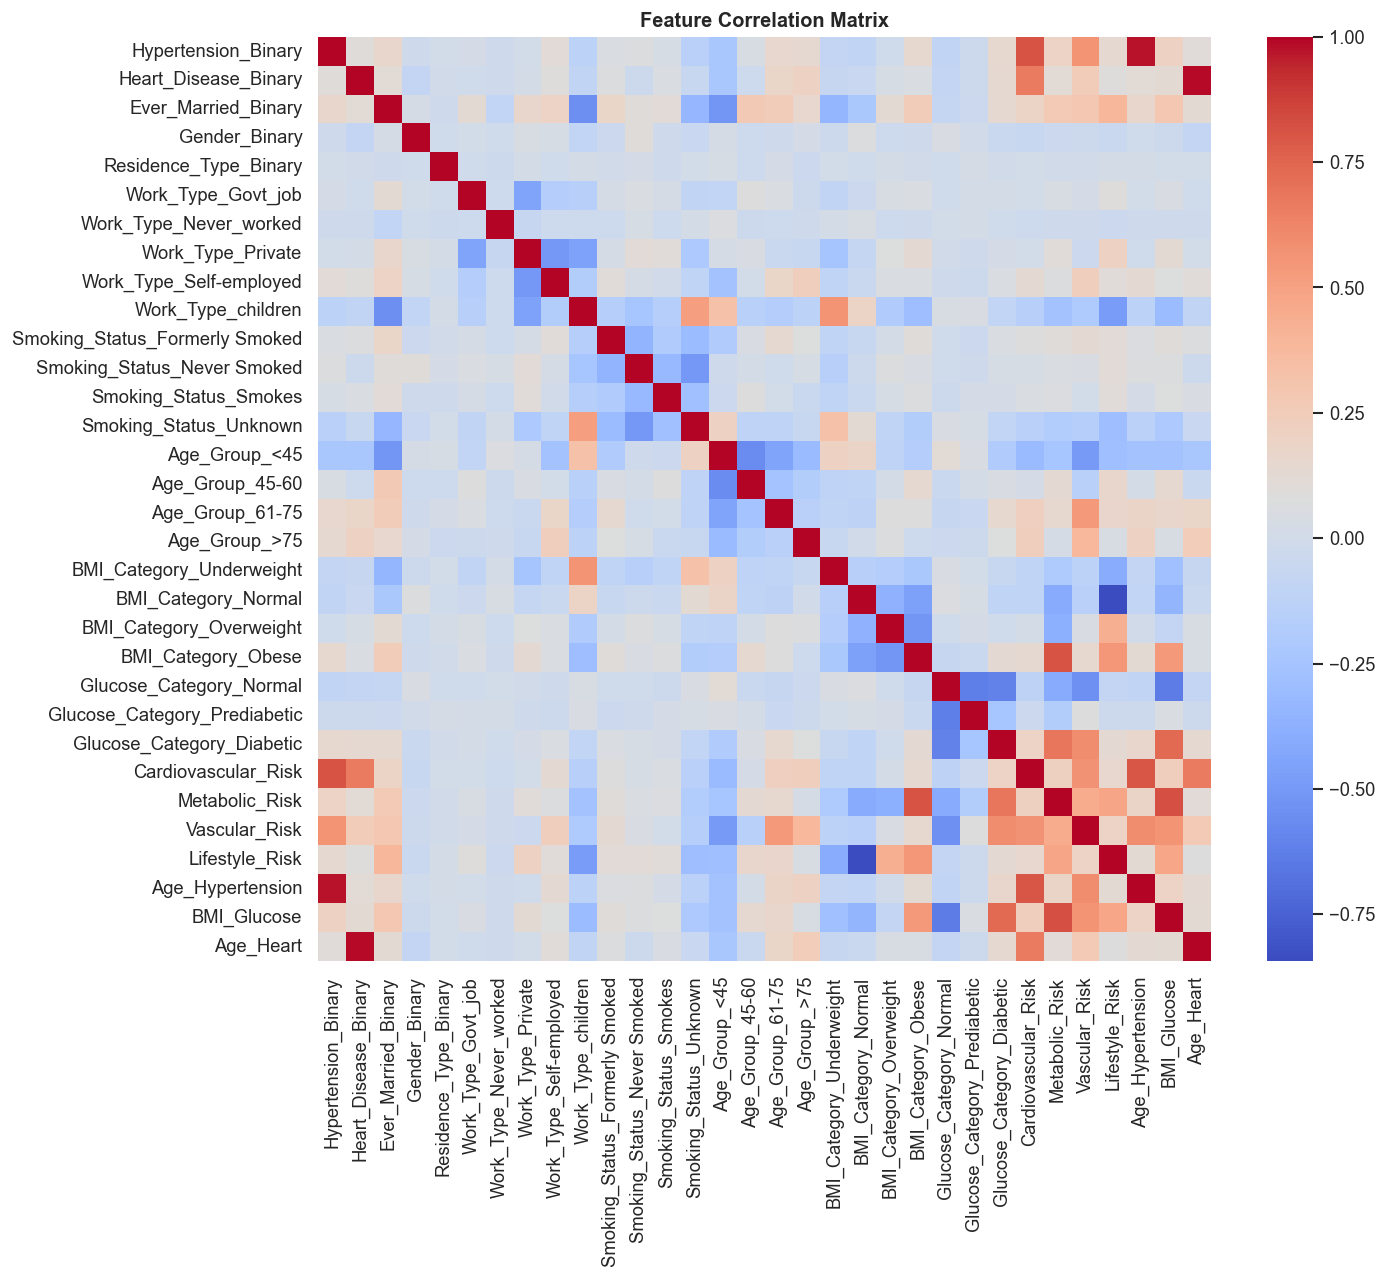

In [77]:
# Check correlation among features
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

---

## **Model Development**

### **Initial Setup**

#### **Feature Selection Functions**

In [78]:
# Use all features for comprehensive analysis

def select_all_features(X_train, X_test):
    print(f"Using all {X_train.shape[1]} features")
    return X_train, X_test, X_train.columns.tolist()

In [79]:
# Select clinically relevant features for stroke prediction

def select_clinical_features(X_train, X_test):
    clinical_features = [
        # Core features
        'Age_Hypertension', 'Age_Heart', 'BMI_Glucose',
        
        # Binary ones..
        'Gender_Binary', 'Hypertension_Binary', 'Heart_Disease_Binary',
        'Ever_Married_Binary', 
        
        # Risk scores and derived features (That I created Earlier)
        'Cardiovascular_Risk', 'Metabolic_Risk', 'Vascular_Risk', 'Lifestyle_Risk'
    ]
    
    available_features = [f for f in clinical_features if f in X_train.columns]
    print(f"Selected {len(available_features)} clinical features")
    
    return X_train[available_features], X_test[available_features], available_features

#### **Class Balancing Functions**
 There's Serve class imbalance, Lets first define different approaches to handle this

**SMOTE:**

In [80]:
def balance_with_smote(X_train, y_train, random_state=42):
    smote = SMOTE(random_state=random_state)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    print(f"Original class distribution: {np.bincount(y_train)}")
    print(f"SMOTE class distribution: {np.bincount(y_train_balanced)}")
    return X_train_balanced, y_train_balanced

**ADASYN:**

In [81]:
def balance_with_adasyn(X_train, y_train, random_state=42):
    adasyn = ADASYN(random_state=random_state)
    X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)
    print(f"Original class distribution: {np.bincount(y_train)}")
    print(f"ADASYN class distribution: {np.bincount(y_train_balanced)}")
    return X_train_balanced, y_train_balanced

**SMOTETomek**

In [82]:
# This combines over and undersampling..

def balance_with_smotetomek(X_train, y_train, random_state=42):
    smotetomek = SMOTETomek(random_state=random_state)
    X_train_balanced, y_train_balanced = smotetomek.fit_resample(X_train, y_train)
    print(f"Original class distribution: {np.bincount(y_train)}")
    print(f"SMOTETomek class distribution: {np.bincount(y_train_balanced)}")
    return X_train_balanced, y_train_balanced

### **Models Definations**

**- Logistic Regression:**

In [83]:
def train_logistic_regression(X_train, y_train, C=0.1, class_weight='balanced', random_state=42):

    model = LogisticRegression(
        C=C,
        penalty='l2',
        solver='liblinear',
        max_iter=2000,
        class_weight=class_weight,
        random_state=random_state
    )
    model.fit(X_train, y_train)
    return model

**- Random Forest:**

In [85]:
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None, 
                        class_weight='balanced', random_state=42):

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        class_weight=class_weight,
        random_state=random_state,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    return model

**- XGBoost:**

In [86]:
def train_xgboost(X_train, y_train, learning_rate=0.1, max_depth=6, 
                  scale_pos_weight=None, random_state=42):

    if scale_pos_weight is None:
        # Calculate imbalance ratio if not provided
        scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        scale_pos_weight=scale_pos_weight,
        random_state=random_state,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_train, y_train)
    return model

**- SVM**

In [87]:
def train_svm(X_train, y_train, C=1.0, kernel='rbf', class_weight='balanced', random_state=42):

    model = SVC(
        C=C,
        kernel=kernel,
        probability=True,
        class_weight=class_weight,
        random_state=random_state
    )
    model.fit(X_train, y_train)
    return model

### **Model Evaluation**

In [88]:
# This function just displays results of a model

def evaluate_model(model, X_test, y_test, model_name="Model"):
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate core metrics (look in list)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Specificity': recall_score(y_test, y_pred, pos_label=0),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Calculate PR-AUC (Precision-Recall AUC)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    metrics['PR_AUC'] = auc(recall, precision)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display results using the helper functions (If you're curious, it's defined in setup file)
    display_metrics(metrics, model_name)
    
    return metrics, y_pred, y_pred_proba, cm

### **Pipleline Handling**

In [89]:
# This is the main function, we'll be using this to easily train all models etc

def run_model_pipeline(X_train, y_train, X_test, y_test, 
                       feature_selection='clinical', 
                       balancing_method='smote', 
                       model_type='logistic', 
                       random_state=42):
    
    # Select features
    if feature_selection == 'clinical':
        X_train_selected, X_test_selected, selected_features = select_clinical_features(X_train, X_test)
    else:
        X_train_selected, X_test_selected, selected_features = select_all_features(X_train, X_test)
    
    # Balance classes
    if balancing_method == 'smote':
        X_train_balanced, y_train_balanced = balance_with_smote(X_train_selected, y_train, random_state)
    elif balancing_method == 'adasyn':
        X_train_balanced, y_train_balanced = balance_with_adasyn(X_train_selected, y_train, random_state)
    elif balancing_method == 'smotetomek':
        X_train_balanced, y_train_balanced = balance_with_smotetomek(X_train_selected, y_train, random_state)
    else:
        X_train_balanced, y_train_balanced = X_train_selected, y_train
        print("No balancing applied")
    
    model_name = ''

    # Train model
    if model_type == 'logistic':
        model = train_logistic_regression(X_train_balanced, y_train_balanced, random_state=random_state)
        model_name = 'Logistic Resgrssion'
        
    elif model_type == 'random_forest':
        model = train_random_forest(X_train_balanced, y_train_balanced, random_state=random_state)
        model_name = 'Random Forest'
        
    elif model_type == 'xgboost':
        model = train_xgboost(X_train_balanced, y_train_balanced, random_state=random_state)
        model_name = 'XGBoost'
        
    elif model_type == 'svm':
        model = train_svm(X_train_balanced, y_train_balanced, random_state=random_state)
        model_name = 'SVM'
    
    # Evaluate model
    metrics, y_pred, y_pred_proba, cm = evaluate_model(model, X_test_selected, y_test, f"{model_name}")
    
    
    # Return results
    results = {
        'metrics': metrics,
        'probabilities': y_pred_proba,
        'confusion_matrix': cm,
    }
    
    return results

In [ ]:
# I'm just writing this for refrence, No need to run it, as we have already executed this previously

# X_train, X_test, y_train, y_test, scaler = prepare_for_ml(processed_data, primary_target='Stroke_Binary')

### **Model Training**

**- Logistic Regression:**

In [90]:
logistic_results = run_model_pipeline(X_train, y_train, X_test, y_test, 
                       feature_selection='all', 
                       balancing_method='smote', 
                       model_type='logistic', 
                       random_state=74)

Using all 32 features
Original class distribution: [3888  199]
SMOTE class distribution: [3888 3888]


  File "d:\Other\Leeds Trinity\Data Science & Artificial Intelligence\Artificial Intelligence\Assessment\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\MadCkull\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MadCkull\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                    

**- Random Forest:**

In [91]:
random_forest_results = run_model_pipeline(X_train, y_train, X_test, y_test, 
                       feature_selection='all', 
                       balancing_method='adasyn', 
                       model_type='random_forest', 
                       random_state=42)

Using all 32 features
Original class distribution: [3888  199]
ADASYN class distribution: [3888 3839]


**- XGBoost:**

In [92]:
xgboost_results = run_model_pipeline(X_train, y_train, X_test, y_test, 
                       feature_selection='clinical', 
                       balancing_method='none', 
                       model_type='xgboost', 
                       random_state=42)

Selected 11 clinical features
No balancing applied


**- SVM:**

In [93]:
svm_results = run_model_pipeline(X_train, y_train, X_test, y_test, 
                       feature_selection='all', 
                       balancing_method='smotetomek', 
                       model_type='svm', 
                       random_state=42)

Using all 32 features
Original class distribution: [3888  199]
SMOTETomek class distribution: [3871 3871]


In [95]:
# I'll use this in Performance Analysis

model_results = {
    'Logistic Regression': logistic_results,
    'Random Forest': random_forest_results,
    'XGBoost': xgboost_results,
    'SVM': svm_results
}

In [ ]:
model_results

---

## **Phase 4:**  **Performance Analysis**

**ROC Curves:**

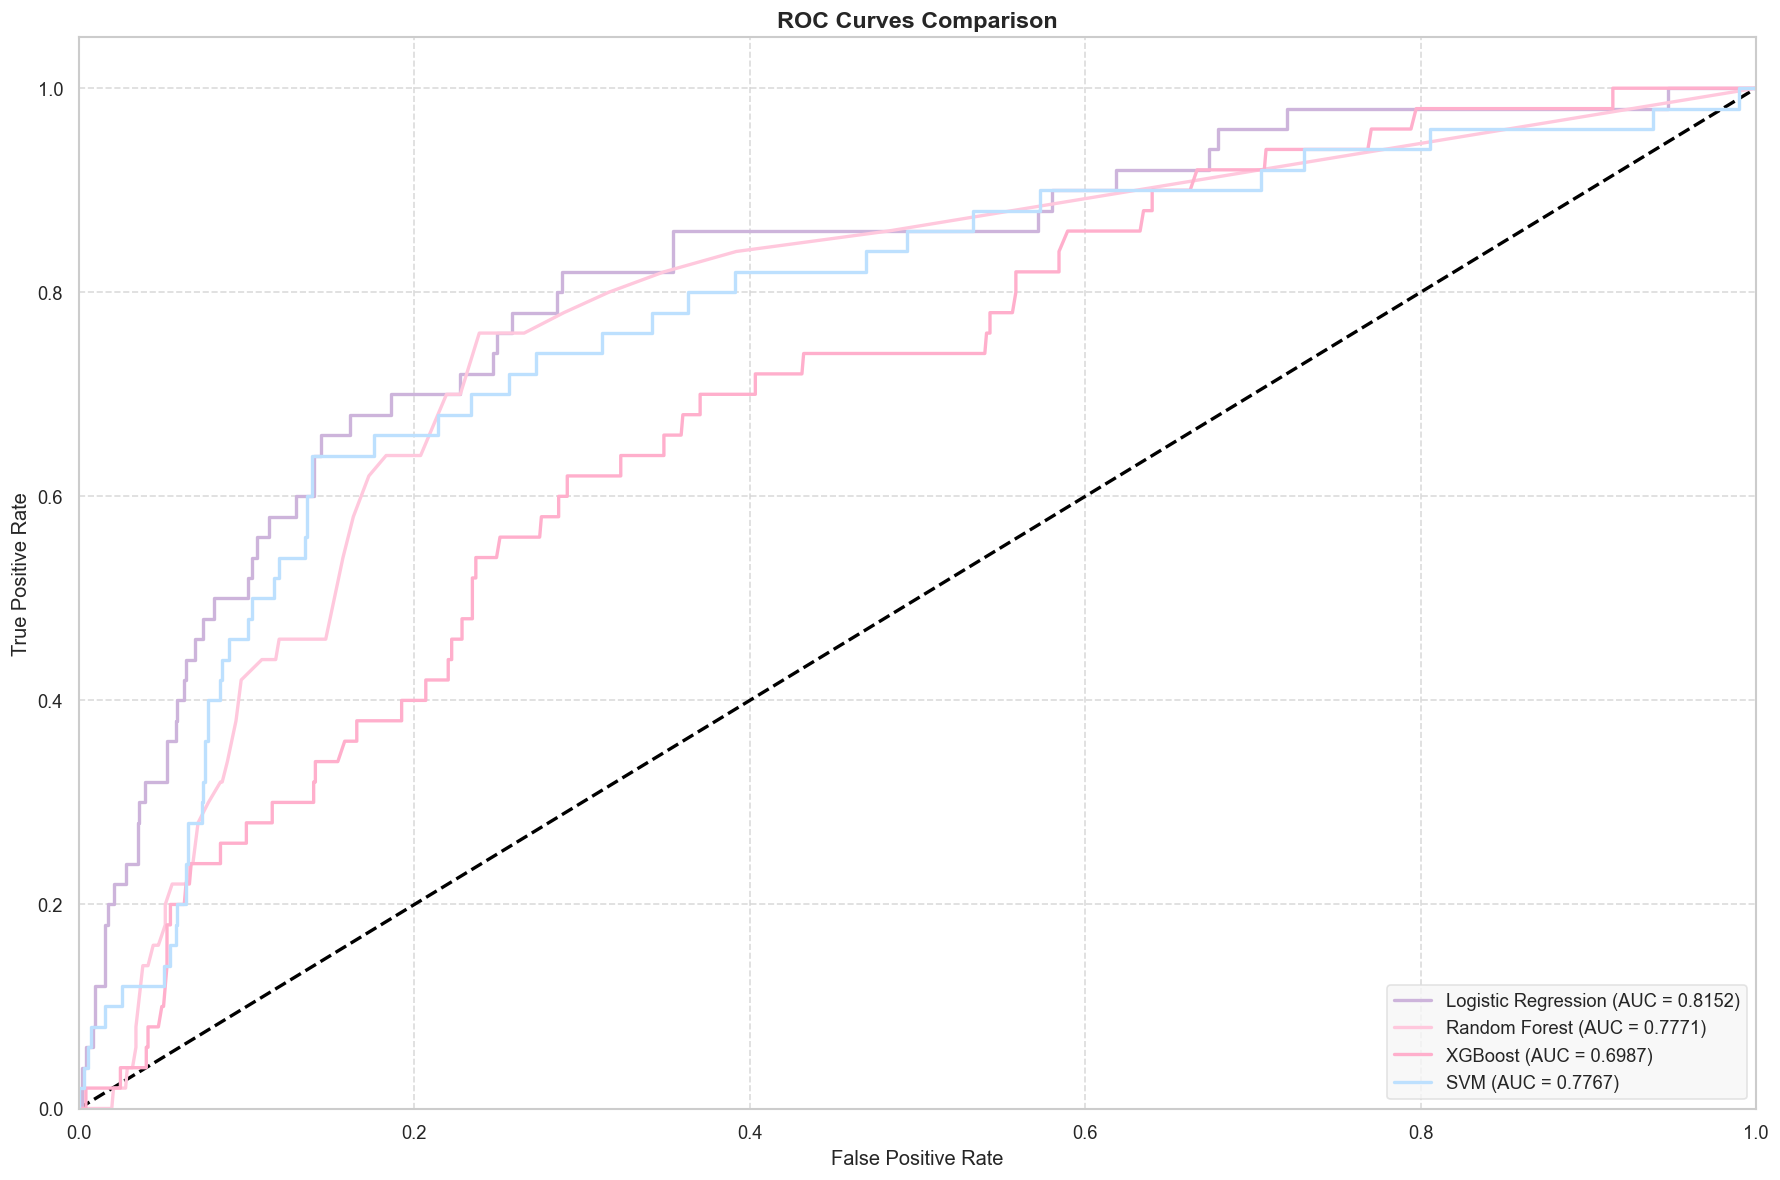

In [96]:
plot_roc_curves(y_test, model_results)

**Precision-Recall Curves:**

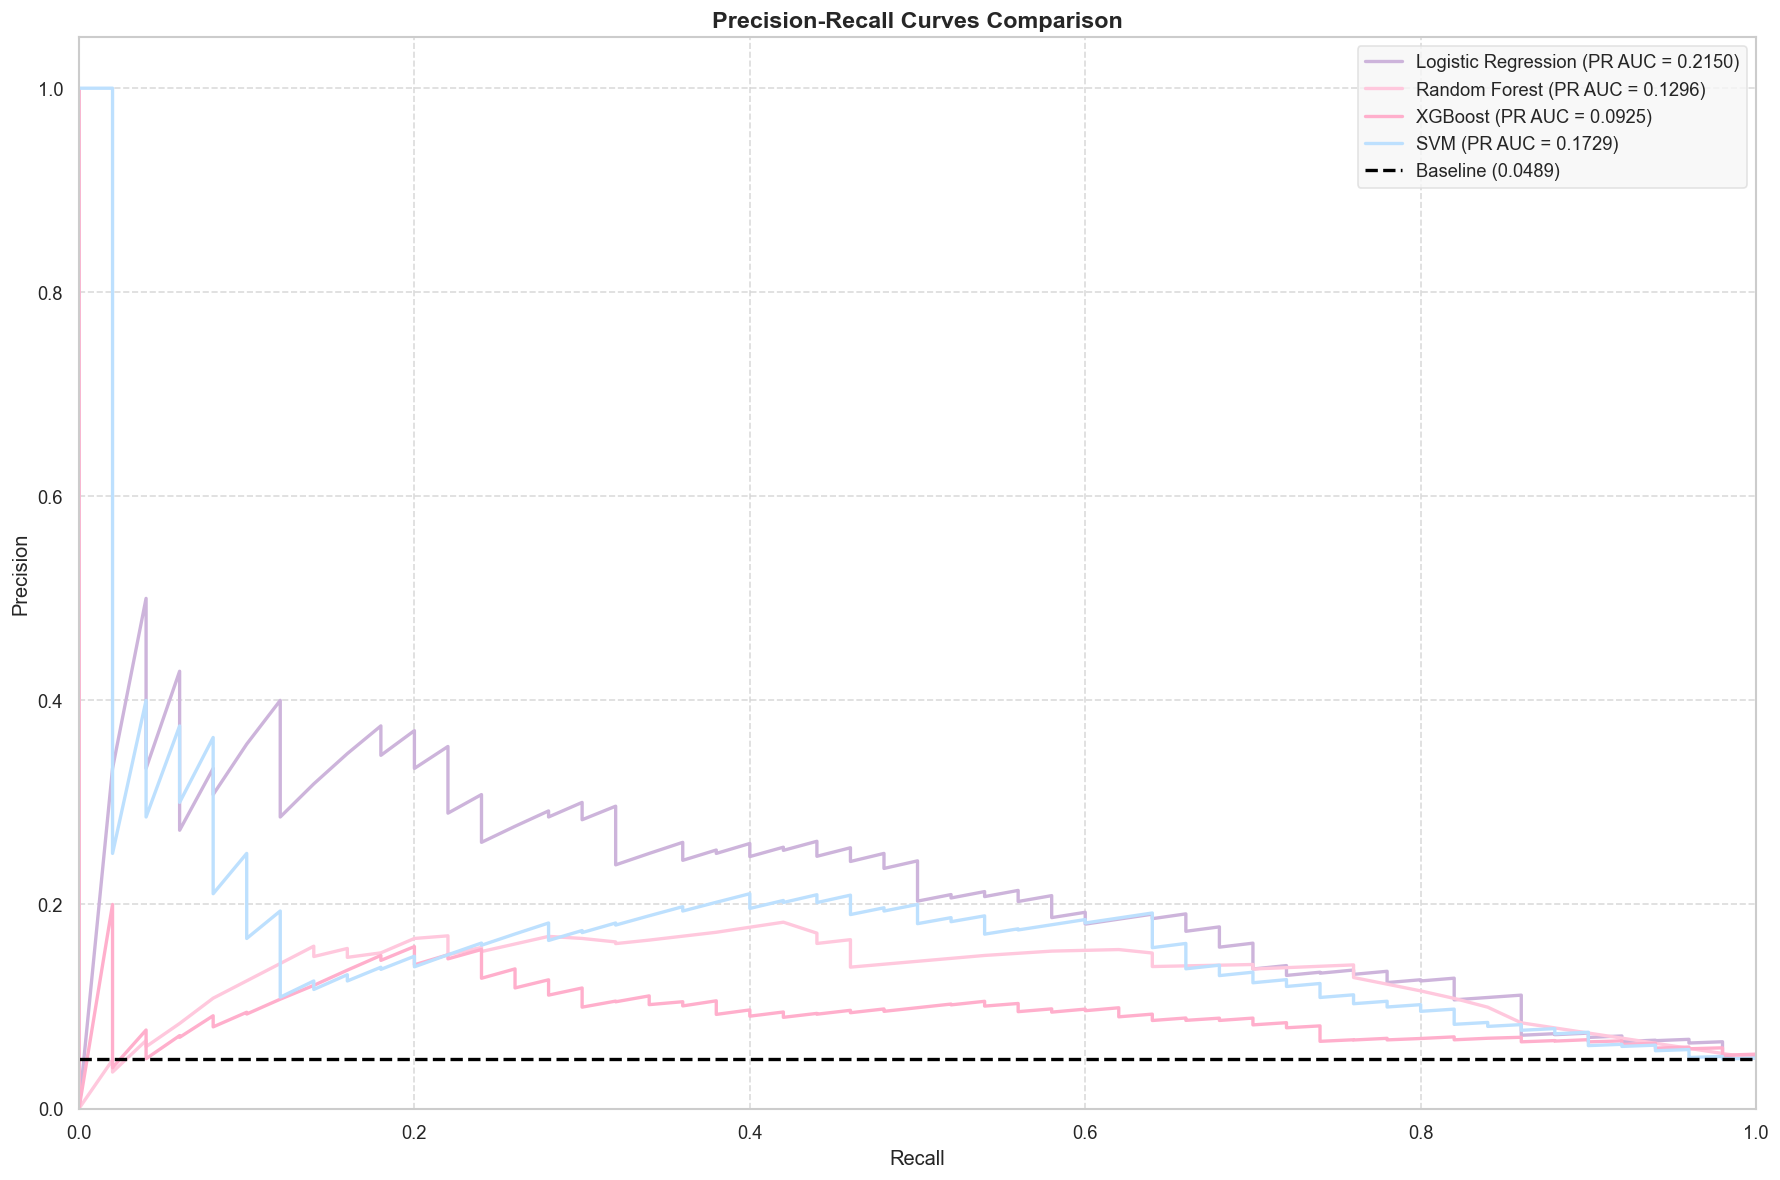

In [97]:
plot_pr_curves(y_test, model_results)

**Metric Comparisons:**

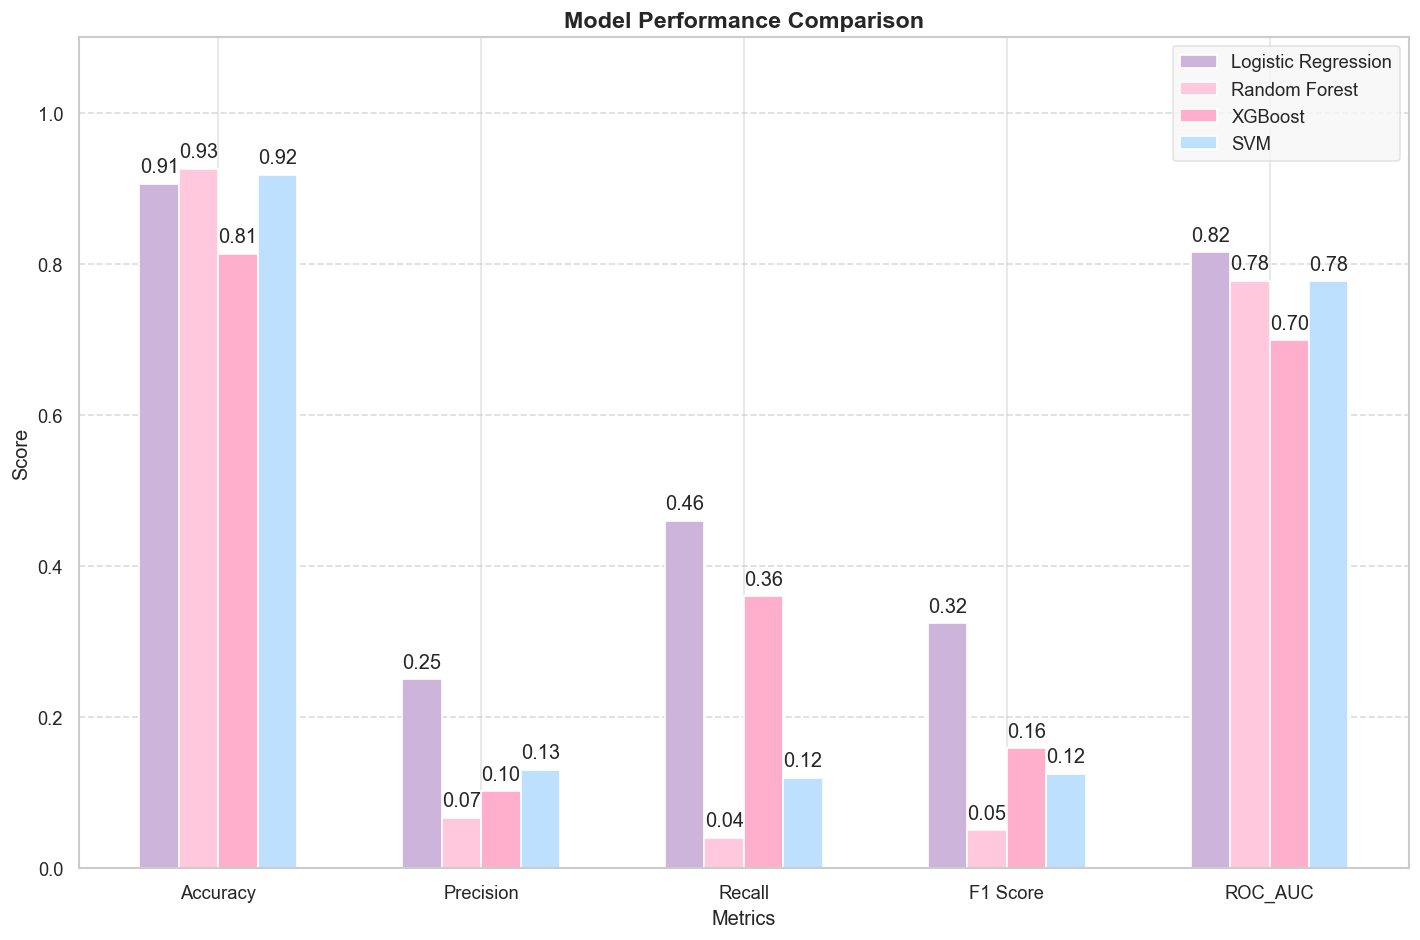

In [98]:
plot_metrics_comparison(model_results)

**Confusion Matrices:**

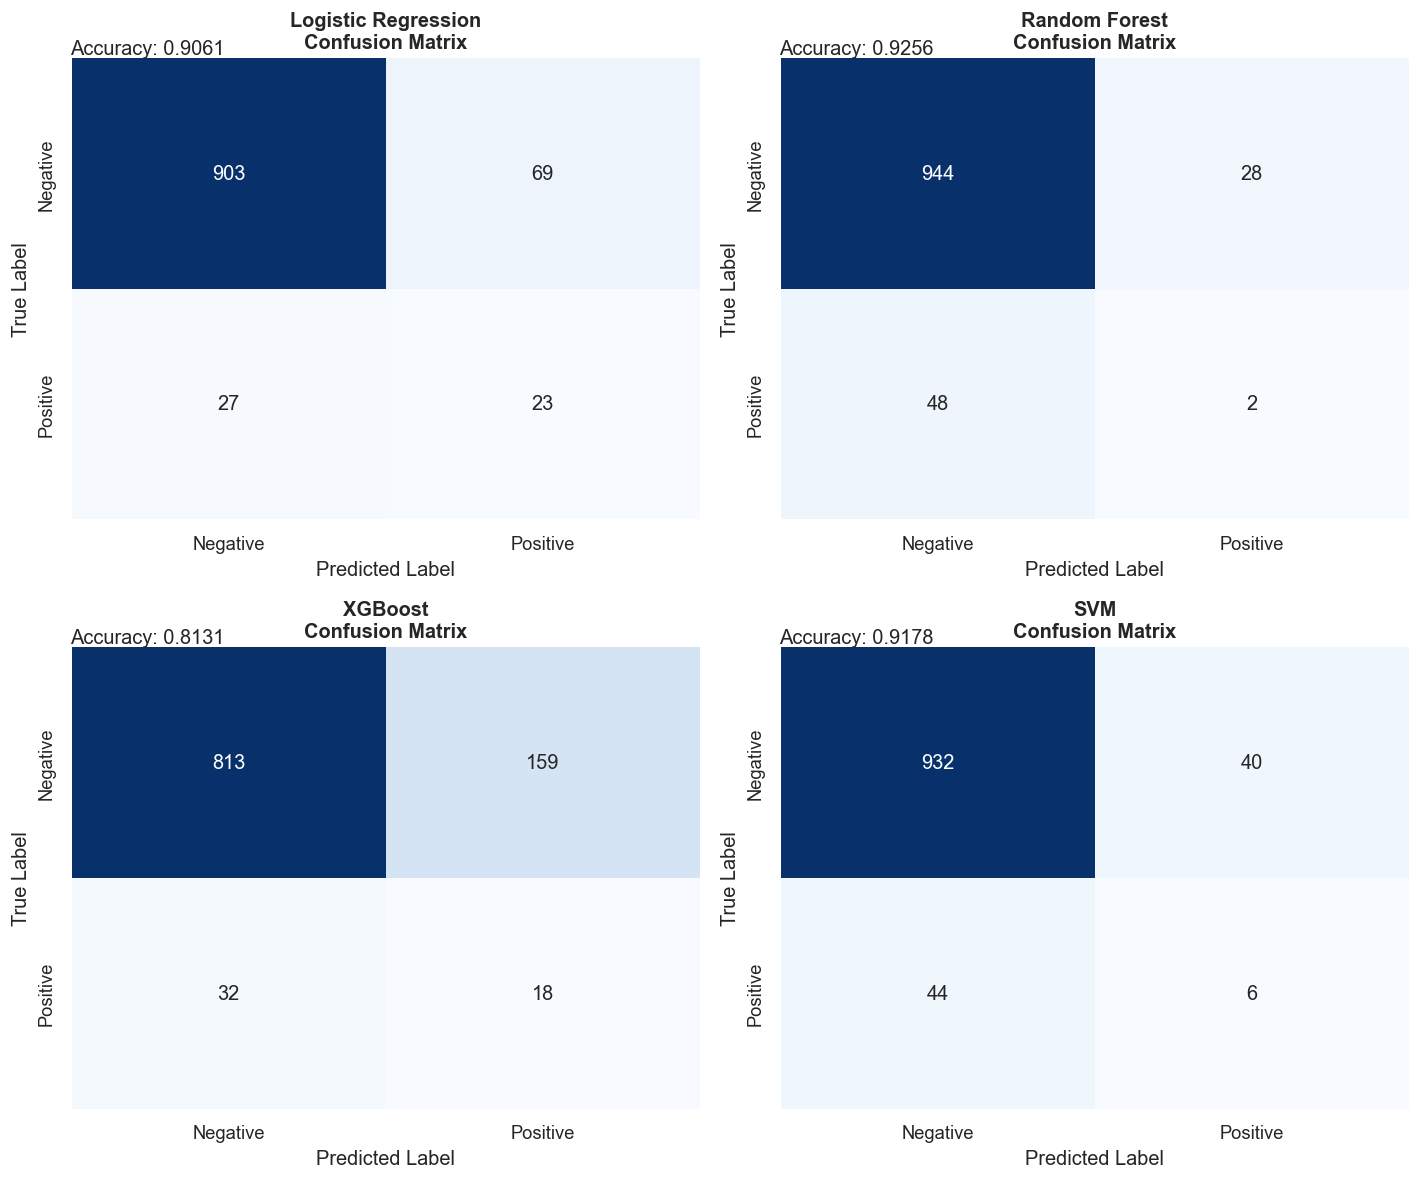

In [99]:
plot_confusion_matrices(model_results)